# What is this

On February 11, 2020, Steven Weisberg was alerted to a bug on the Virtual Silcton platform. Over the next year, along with collaborators, Nora Newcombe and Victor Schinazi, we discovered the source of the bug and collected a new large dataset to determine as best we can, the effects of the bug on previously collected data. 

This notebook is an in-depth explanation of the bug and its impacts on Virtual Silcton data. First, a TL;DR and an FAQ. 

## Too long; didn't read

Since the very first Virtual Silcton project (Weisberg, Schinazi, Shipley, Newcombe, & Epstein, 2014), a bug has affected the onsite pointing tasks. (The bug also affects off-site pointing data, though few people have collected such data, but those data are fully recoverable. Please email Steve Weisberg if you want to do that.) 

The nature of the bug is such that the original error-free data are unrecoverable. However, the bug is not random. It differentially affects some trials and participants more than others. These properties made the bug very difficult to detect but also, we now think, minimally damaging to fundamental conclusions. 

The new data we have collected show that the effects of the bug vary across trials and participants. At the trial level, many data points are unaffected or minimally affected. More critically, at the participant level, the bug results in a reduction of the overall error rate and the variability among participants. Nevertheless, poor navigators remain poor navigators and good navigators remain good navigators. In fact, the rank ordering of participants is almost identical with and without the bug. 

## Answering a few other questions

### 1. Why so much detail? 

Under ordinary circumstances, a bug in an experimental paradigm would not necessitate so much explanation. However, this is a bug affecting a widely-used and well-cited experimental paradigm that has been used to collect data from thousands of people in various labs around the world. 

The Virtual Silcton platform has been publicly available since its inception and every researcher who has used or cited the Silcton paradigm deserves to know the exact reasons for the existence of the bug and how it affects the data. 

### 2. I collected Virtual Silcton data - what do I do? 

At this time, we recommend adjusting your original data at the participant-level by running your data through a web application we have created for this process [WEB APP and details FORTHCOMING]. Doing so will help you decide whether you need to run a correction to a published article or (in drastic cases) consider a retraction. We are more than happy to contribute what we can toward this effort. 

What we cannot do at this time is re-create the trial-level data. If you have analyses that rely on trial-level analyses, the only solution we can offer is to collect new data using Virtual Silcton 2.0. We are happy to contribute to efforts to recreating Virtual Silcton data at the trial level.

### 3. What about the Silcton studies I've cited? 

We are in the process of publishing a full report of our newly collected data, which was a replication of Weisberg et al. (2014). In overview, the original (buggy) analyses and the new (non-buggy) analyses converge well. The findings we reported in 2014 not only replicate but are, if anything, stronger in the non-buggy analyses. 

Moreover, the analyses dealing with the model building task are all unaffected by the bug (except where it was compared to the pointing task). The converging evidence from this task increases our confidence in the original results. 

## A personal note

The year 2020 was an inordinately difficult year. Discovering a bug in an experimental paradigm I have stood behind, presented, published on, and shared was the worst thing that has ever happened to me, professionally. 

I am extraordinarily grateful for the (mental, professional, and emotional) support from Victor Schinazi and Nora Newcombe, who have been involved in this process since Day 1. I am also grateful to everyone else who has been supportive or helped. This includes the research assistants and students in labs in Florida, Philadelphia, and Australia, who helped collect and code the new and old data. I am especially grateful to expert data sleuth, Derek Huffman, who discovered the initial bug, and to Andrea Ferrario who supported us in the development of the web application to provide recovered data affected by the bug from past experiments.

After discovering that these bugs have minimal effects on published data, I feel more optimistic (not less) about future work and bug discovery and the process of science. 

Thank you all for reading. 

**-Steve**

# Background

## Virtual Silcton

The Virtual Silcton platform includes a series of navigation and spatial tasks designed to explore individual differences in spatial navigation in virtual environments. Current documentation is available [here](http://stevenmweisberg.com/Virtual_Silcton_Documentation/). 

Virtual Silcton is based on a previous real world experiment by [Schinazi et al in 2013](https://onlinelibrary.wiley.com/doi/epdf/10.1002/hipo.22111). In Virtual Silcton, participants are asked to explore and learn the names and positions of eight target buildings along two main routes and two connecting routes. Specifically, participants are asked to walk along demarcated paths in the virtual environment, and then are tested using several different measures to see how accurately they can learn the directions and distances and directions between the target buildings. The two main tasks to measure accuracy are a pointing task and a map building task. 

<img src= "../images/routeone.png">
<img src= "../images/routetwo.png">
<img src="../images/vsmap.png">

## Pointing Task
To understand the effects of the bug, it is critical to understand how the pointing task works. 

Participants are located next to one of the eight buildings that they have learned (directly beneath the gem in the virtual world). They are prompted to point to one of the other buildings. They point to all of the other buildings from this first building and are then automatically teleported to the next building and asked to point to all the buildings from there. This process continues until participants complete all possible pointing combinations.

<img src="../images/point.png">

The dependent variable of the pointing task is the error, computed as the angular distance between the CORRECT ANGLE and the PARTICIPANT'S RESPONSE. 

Canonical results from the Virtual Silcton experiments tabulate error on the pointing task separately for **within** and **between** route trials. 

* Within: Pointing to buildings on the same main route as the building the participant is standing next to.
* Between: Pointing to buildings on the other main route.

<img src="../images/between_within.png">

## Bug discovery

In February 2020, I was alerted to an irregularity in the Virtual Silcton onsite pointing task by Derek Huffman, who was planning to use Virtual Silcton for his own research project. 

Derek noted that the 'bearing,' which was being stored on the Virtual Silcton website only varied from 0-180, rather than 0-360 as would be expected. 

<div class="alert alert-block alert-info">
<b>Tip:</b>

Bearing - The participant's response relative to the reference angle.

Actual angle - The correct angle, relative to the reference angle. 

Abs error - The unsigned error (or, the absolute value between bearing and actual angle, correcting for being > 180). 

Reference angle - The angle created by A = Facing Landmark, B = Start Landmark, C = Target Location: &#8736; ABC 
</div>

<img src="../images/Silcton_Website_Bearing.png">

From my knowledge of the code, I assumed that something in the Unity backend (or website backend) would account for this possibility. 

As I explored more, I realized that the way the "actual directions" were stored (see the column "actual directions" in the image above), also varied from 0-180. 

A conclusive test revealed that pointing to the right for a building that is to one's left resulted in 0 degrees of error; rather than the expected 180. 

I discovered this error on the night of 2/11/2020 and immediately contacted two of the original authors of the Virtual Silcton paper (Weisberg, Schinazi, Newcombe, Shipley, & Epstein, 2014), Nora Newcombe and Victor Schinazi, to alert them to what I now realized was an insidious bug in the way the data were being calculated for the onsite pointing task. 

Further investigation revealed that the cause of the bug was due to the fact that Unity could originally only output "unsigned" angles (varying from 0-180 away from some target direction). This angle was calculated as follows in Unity. 
<img src="../images/Original_Unity_Pointing_Angle_Calculation.png">

In [2]:
%%html
<style>
table {align:left;display:block}
</style>

## A note on the conventions used to discuss angles: 
Here, we use the convention that angles are reported between \[-180, 180\] (rather than \[0-360\]). 

## An example

Take x = 37 as the actual direction. Let us consider a bearing y equal to the actual direction, i.e., `x=y`. 

Then: 

| Buggy / Correct | Formula | Result |
| :---- | :--- | :------- |
| Correct | abs( x - y ) | abs(37 - 37) = 0 |
| Buggy | abs( abs(x) - abs(y) ) | abs( abs(37) - abs(37) ) = 0 |

On the other hand, if we take bearing y equal to the direction but counter-clockwise, i.e., `y=-37`. 

Then: 

| Buggy / Correct | Formula | Result |
| :---- | :--- | :------- |
| Correct | abs( x - y ) | abs( 37 - -37 ) = abs( -74 ) = 74 | 
| Buggy | abs( abs(x) - abs(y) ) | abs( abs(37) - abs(-37) ) = 0 | 



## Visual example
<img src="../images/pointingDemos/Slide1.JPG">
<img src="../images/pointingDemos/Slide2.JPG">
<img src="../images/pointingDemos/Slide3.JPG">

# Bug explanation

What was going wrong? 

Imagine a compass where each bearing is assigned a number from between 0-360. North might arbitrarily be assigned to be 0. We can equivalently represent the compass as from -180 to 180, where 0 is still North, +90 = East (a clockwise rotation), +/- 180 = South, and -90 equals West (a counter-clockwise rotation). 

We can then describe a pointing angle with reference to North as degrees away from 0, with positive indicating a clockwise direction and negative indicating a counter-clockwise direction. 

Now let's say that someone is pointing to a building that is located to the Northeast (+45 degrees). Pointing error is calculated as the absolute value of the difference between the estimated angle minus the actual angle (|estimate - actual| = error).[<sup>1</sup>](#fn1 "This is technically unsigned pointing error that does not account for whether the person points to the left or right of the target and is what we have typically analyzed in Silcton projects.")

<sup>1</sup><span id="fn1">Technically, unsigned pointing error that does not account for whether the person points to the left or right of the target and is what we have typically analyzed in Silcton projects.</span>

In [3]:
# Import a few packages and initialize a handy symbol

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
import os
from sklearn import linear_model

# Edit some plotting parameter defaults
params = {'legend.fontsize': 18,
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize':24,
         'xtick.labelsize':18,
         'ytick.labelsize':18,
         'axes.spines.right':False,
          'axes.spines.top':False}

plt.rcParams.update(params)

# Save the degree sign
deg= '\u00b0'

# Do we want to save figures - if so, where and which format
savefig = True
figDir = os.path.join('..','images','jupyter_figures')


In [4]:
# Let's write a function that will calculate the pointing error for an arbitrary judgment.

def correctPointing(participantAngle,correctAnswer):
    '''Return the non-buggy error for a given participant response and correct answer'''
    global deg
    
    # The error calculation
    error = abs(participantAngle-correctAnswer)
    
    if error > 180:
        error = 360 - error
        
    
    return error

## Bug in Recording Pointing Judgments: Absolute value of participant response angles
In the original Silcton code, the Unity script above only recorded **positive** numbers. This means a pointing judgment to the East (+90) would be stored equivalently to a pointing judgment to the West (absolute value of -90 or |-90| = 90). As a result, the above calculations would have resulted in equivalent errors: 

In [5]:
# Here is the buggy version of the pointing coding
def buggyPointing(participantAngle,correctAnswer):
    '''Return the buggy error for a given participant response and correct answer'''
    global deg
    
    # The BUGGY error calculation
    # Take the absolute value of each angle first. Then the difference. 
    # (A separate bug had the correctAnswer as an absolute value as well). 
    bugError = abs(abs(participantAngle)-abs(correctAnswer))
    
    
    # If the difference is greater than 180, correct it. 
    if bugError > 180:
        bugError = 360 - bugError
        
    return bugError


In [6]:
#Try to plug in different values for this to see effects 
correctAnswer = 45

participantJudgment1 = 90

participantJudgment2 = -90

print("POINTS EAST, TARGET WAS NORTHEAST")
actualError = correctPointing(participantJudgment1,correctAnswer)
buggyError = buggyPointing(participantJudgment1,correctAnswer)

print(f"Participant's guess: {participantJudgment1}\n" + f"Participant's buggy guess: {abs(participantJudgment1)}\n" +
      f"Correct answer: {correctAnswer}\n" + f"Buggy correct answer: {abs(correctAnswer)}\n" + 
      f"Actual error: |{participantJudgment1} - {correctAnswer}| = {actualError}\n" + 
      f"Buggy error: | |{participantJudgment1}| - |{correctAnswer}| | = {buggyError}\n")

print("POINTS WEST, TARGET WAS NORTHEAST")
actualError = correctPointing(participantJudgment2,correctAnswer)
buggyError = buggyPointing(participantJudgment2,correctAnswer)

print(f"Participant's guess: {participantJudgment2}\n" + f"Participant's buggy guess: {abs(participantJudgment2)}\n" +
      f"Correct answer: {correctAnswer}\n" + f"Buggy correct answer: {abs(correctAnswer)}\n" + 
      f"Actual error: |{participantJudgment2} - {correctAnswer}| = {actualError}\n" + 
      f"Buggy error: | |{participantJudgment2}| - |{correctAnswer}| | = {buggyError}\n")


POINTS EAST, TARGET WAS NORTHEAST
Participant's guess: 90
Participant's buggy guess: 90
Correct answer: 45
Buggy correct answer: 45
Actual error: |90 - 45| = 45
Buggy error: | |90| - |45| | = 45

POINTS WEST, TARGET WAS NORTHEAST
Participant's guess: -90
Participant's buggy guess: 90
Correct answer: 45
Buggy correct answer: 45
Actual error: |-90 - 45| = 135
Buggy error: | |-90| - |45| | = 45



One thing you might realize at this point is that it greatly matters what the correct answer is. 

If the correct answer is 0, there's no difference at ALL between the correct and buggy judgments. (The equation is below). 

To help us visualize this issue, we'll write a function to see what happens as if we had one participant pointing to all possible angles (from -180 to 180), then plot the comparison of the actual error vs. the buggy error. 

The more **overlap** we see on these plots, the **less** of an effect the bug would have. 

<div class="alert alert-block alert-info">
<b>Tip:</b> If you're viewing this as a Jupyter Notebook, you can edit the script below and run the code yourself to see what happens for different values.</div>

C:\Users\stevenweisberg\AppData\Local\Continuum\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


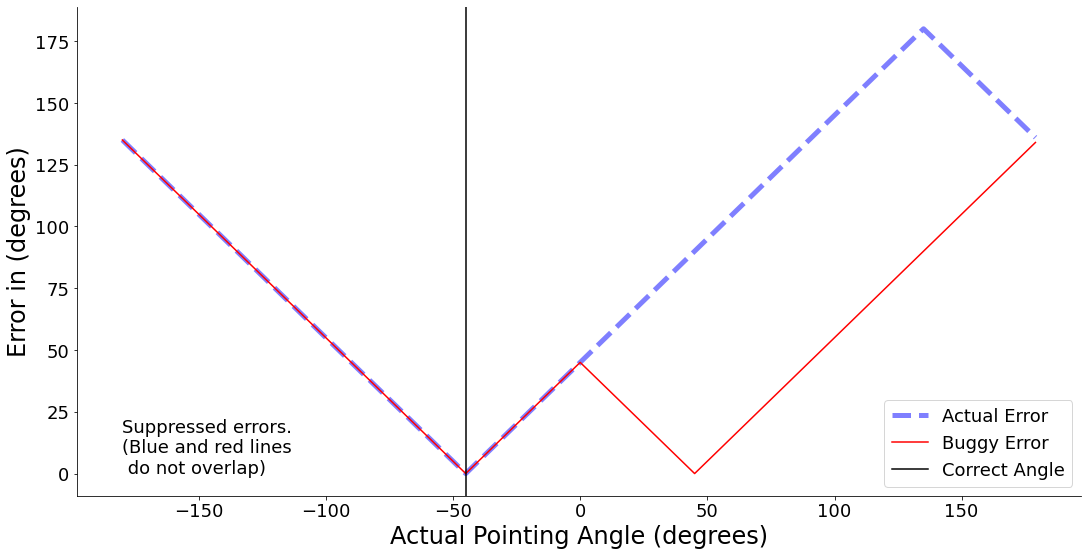

In [7]:

def plotErrorComparison(correctAnswer,
                        output='sample.png',
                        savefig=savefig):
    '''Simulate all possible errors for buggy and correct coding and compare them graphically.'''
    
    # Grab all angles between -180 to 180, counting by 1
    allAngles = np.arange(-180,180)
    
    # Calculate all errors (correct and buggy)
    actualErrors = np.array([correctPointing(angle,correctAnswer) for angle in allAngles])
    buggyErrors = np.array([buggyPointing(angle,correctAnswer) for angle in allAngles])
    
    # Plot them and annotate
    fig,ax = plt.subplots(figsize=(18,9))
    
    plt.plot(allAngles,actualErrors,'b--',linewidth=5,alpha = .5,label='Actual Error')
    plt.plot(allAngles,buggyErrors,'r',label='Buggy Error')
    plt.xlabel('Actual Pointing Angle (degrees)')
    plt.ylabel('Error in (degrees)')
    plt.annotate('Suppressed errors.\n(Blue and red lines\n do not overlap)',[-180,0],fontsize=18)
    plt.axvline(correctAnswer,color='black',label='Correct Angle')
    plt.legend(loc='lower right')

    
    if savefig:
        plt.savefig(output)
    plt.show()
    

correctAnswer = -45
output = os.path.join(figDir,'errorComparison_' + str(correctAnswer) + '.png')

plotErrorComparison(correctAnswer,output=output)  

## Effect of Bug

Bug 1 does not affect all trials equally, but rather systematically impacts trials whose answers are close to 90 degrees on either side. 

Imagine a pointing judgment with a `correctAnswer = 0`. In this case, it wouldn't matter if we take the absolute value of the participant's response. 

`87 - 0 = 87 = |-87| - 0 = 87`

The further we get from 0 degrees (or 180 degrees, where the calculation is the same), the worse this gets until we get to 90, which is the maximally worst possible effect. 

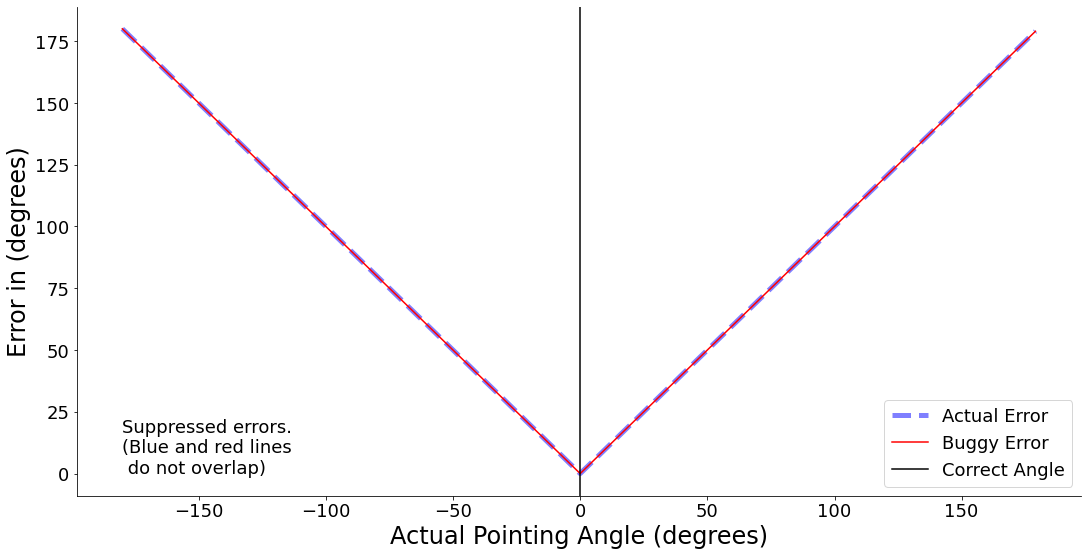

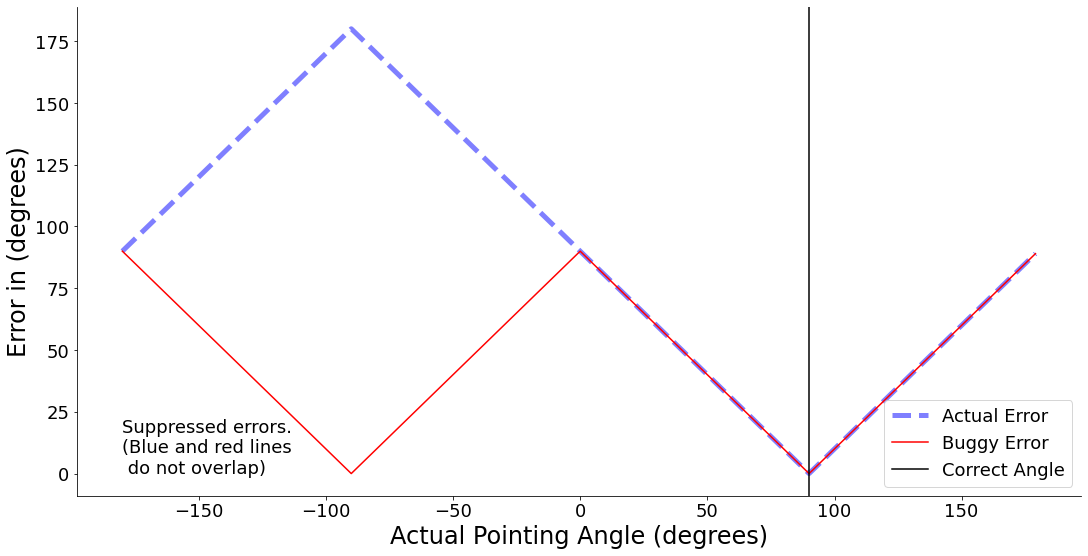

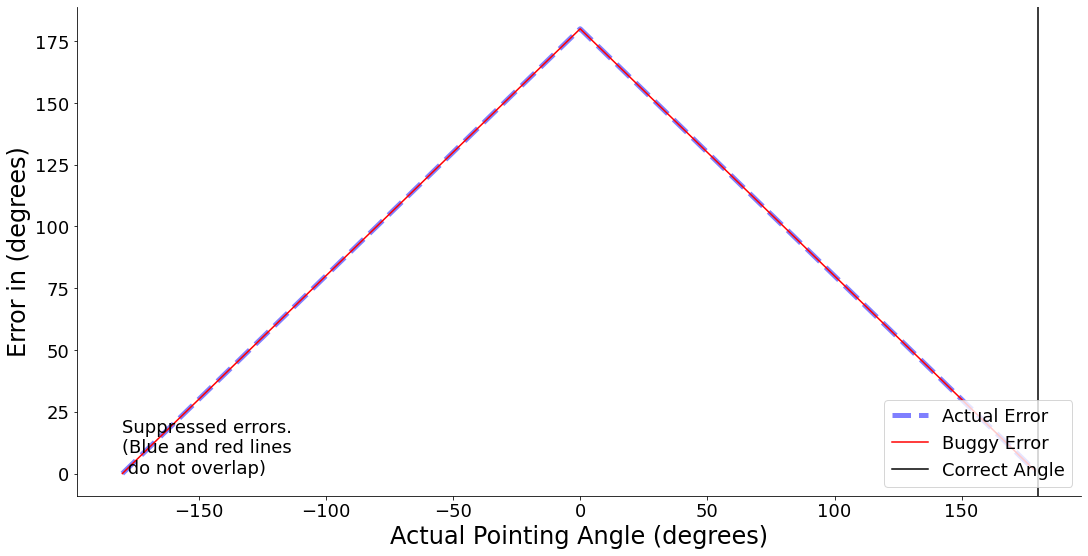

In [8]:
correctAnswers = [0,90,180]

for correctAnswer in correctAnswers:
    output = os.path.join(figDir,'errorComparison_' + str(correctAnswer) + '.png')
    plotErrorComparison(correctAnswer,output=output)  


## Two nuances

### Absolute value of correct answer angles

The buggy calculation was not solely for pointing judgments, but ALSO for correct answers. That means a building that was Northeast was equivalent to a building that was Northwest. 

Technically, this was a separate bug, but really only caused more trials to be affected in a less predictable way than had it not existed. 

(It came about because of the same kind of Unity bug on a different calculation). 



### The reference direction changed for each pointing location
These effects are difficult to parse already. Making things more complicated, Virtual Silcton angles were not calculated from the same North for all pointing judgments. 

Recall that participants pointed TO all target buildings FROM all target buildings. The `correctAnswer` was calculated based on the **facing direction** at each building. That is, if you're standing at Building 1, 'North' is calculated as the facing direction between Building 1 -> Building 2, and all other angles are calculated from that. Thus, each pointing trials' effects are slightly different depending on which building the participant was standing next to. 

For example, when standing at Building 1, the pointing direction to Building 4 might be +90. But when standing at Building 2, the pointing direction to Building 4 might be +10. Judgments from Building 1 would thus be MORE BIASED (resulting in BETTER performance just due to chance) than Building 1. 

<div class="alert alert-block alert-warning">
<b>Alert:</b> This is critical for thinking about the trial-level data. What this means is that a participant committed a buggy pointing judgment if they pointed to the opposite side of the circle from the side where the correct judgment was. But what determines the other side of the circle is NOT static. Instead, it varies depending on where the participant was pointing FROM. 
</div>

The upshot of these two nuances is that the bugged pointing errors were much more nefarious and it was more difficult to determine their effects. 

# Comparing correct and buggy data

Below, you will find a few highlights of the comparison between buggy and correctly-coded data. 

The new data were collected online after the pointing bugs were fixed. Three labs in three locations (University of Florida; Temple University; Bond University) collected approximately 50 subjects each. Due to the COVID-19 pandemic, data were collected by having the experimenter guide the participants through the tasks via video call. Specifically, the experimenter read off all instructions and walked the participant through the paradigm as if the participant were conducting the experiment in the lab. 

This difference with the original Silcton experiments remains as a confound, though aside from a few technical issues, we do not anticipate a large difference between the online participants and those that participated in the research in the lab. As in the original studies, undergraduate psychology majors were recruited via SONA (or equivalent). 

<div class="alert alert-block alert-warning">
<b>Alert:</b> Recall that because of the way the data were stored originally, we have **no way of knowing** whether the original data collected had a bug or not! 
</div>


The Jupyter code is slightly abridged. The full script can be found [here](./silctonMergeCleanData.py)


In [94]:
# Load in the data (newly collected and original)

# We have participant-level data and pointing trial-level data
participantData = pd.read_csv('../CleanedData/masterDF.csv')
pointingData = pd.read_csv('../CleanedData/masterPointing.csv')

# Create a version just with the new data
avgNew = participantData.copy()
avgNew = avgNew[avgNew['New_or_Original']=='New']

# Good_pointing and bad_pointing in this data set refer to correct and buggy coding respectively. 

new = participantData[participantData['New_or_Original']=='New'].copy()
original = participantData[participantData['New_or_Original']=='Original'].copy()


## Demographics

In [10]:

display(pd.DataFrame(avgNew.groupby('New_or_Original')['participant'].count()))
display(pd.DataFrame(avgNew.groupby('Site')['participant'].count()))
display(f'Average participant age was {avgNew["Age"].mean():.2f} years (SD = {avgNew["Age"].std():0.2f})')

display(pd.DataFrame(avgNew.groupby('gender')['participant'].count()))

display(pd.DataFrame(avgNew.groupby('Hispanic')['participant'].count()))
display(pd.DataFrame(avgNew.groupby('Racial_Category')['participant'].count()))
# Old Demographics (not displayed here)
#avgOld = participantData.copy()
#avgOld = avgOld[avgOld['New_or_Original']=='Original']
#display(pd.DataFrame(avgOld.groupby('gender')['participant'].count()))

display(pd.DataFrame(avgNew.groupby('trackpad/mouse')['participant'].count()))

,participant
New_or_Original,
New,147


,participant
Site,
AU,56
Temple,26
UF,65


'Average participant age was 20.85 years (SD = 4.24)'

,participant
gender,
Female,96
Male,51


,participant
Hispanic,
Hispanic/Latino,23
Not Hispanic/Latino,67


,participant
Racial_Category,
Asian,16
Black/African American,11
More Than One Race,3
Other:,1
Unknown/Do Not Wish To Say,4
White,55


,participant
trackpad/mouse,
Mouse,1
Trackpad,2
mouse,20
trackpad,60
trackpad,7
trakckpad,1


# Results 

## Replicating Buggy Data

First, we'll compare the old data to the new data using just the **buggy coding**. 

This will tell us (roughly) how different our samples are. 

In [11]:
def cohensD(m1,m2,sd1,sd2):
    sdPooled = np.sqrt((sd1**2 + sd2**2)/2)
    
    return (m1 - m2)/sdPooled


def compareNewOld(new,original,pointing):
    
    [t,p] = stats.ttest_ind(new[pointing],original[pointing])
    
    d = cohensD(np.mean(new[pointing]),np.mean(original[pointing]),np.std(new[pointing]),np.std(original[pointing]))
    
    print(f'New participants (N = {np.count_nonzero(new[pointing])}, M = {np.mean(new[pointing]):.2f}, SD = {np.std(new[pointing]):.2f}) were significantly more accurate on {pointing}')
    print(f'compared to original participants (N = {np.count_nonzero(original[pointing])}, M = {np.mean(original[pointing]):.2f}, SD = {np.std(original[pointing]):.2f})')
    print(f't({np.count_nonzero(new[pointing]) + np.count_nonzero(original[pointing])-2}) = {t:.2f}, p = {p:.5f}, d = {d:.2f}\n')


In [12]:
compareNewOld(new,original,'bad_pointing_coding_between')

compareNewOld(new,original,'bad_pointing_coding_within')


New participants (N = 147, M = 40.46, SD = 16.06) were significantly more accurate on bad_pointing_coding_between
compared to original participants (N = 244, M = 45.48, SD = 13.46)
t(389) = -3.31, p = 0.00102, d = -0.34

New participants (N = 147, M = 17.95, SD = 11.36) were significantly more accurate on bad_pointing_coding_within
compared to original participants (N = 244, M = 23.50, SD = 11.78)
t(389) = -4.56, p = 0.00001, d = -0.48



In [143]:
from sklearn.cluster import KMeans
from matplotlib.colors import Normalize
from scipy.spatial import ConvexHull
from scipy import interpolate
import matplotlib.patches as mpatches

def kMeansSilcton(df,label,ax=[],color='red',between='bad_pointing_coding_between',within='bad_pointing_coding_within',
                  n_clusters=3,overlay=True,withinOutlierCutoff=360,betweenOutlierCutoff=360):
        
    if ax == []:
        fig, ax = plt.subplots(figsize=(18,9))
    

    df=df[df[within]<withinOutlierCutoff]
    df=df[df[between]<betweenOutlierCutoff]

    # Select and normalize a colormap
    if color == 'red':
        cmap = plt.cm.Reds
    else:
        cmap = plt.cm.Blues

    norm = Normalize(vmin=-2, vmax=n_clusters)

    # K-means for new data
    X = df[[between,within]]
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # Calculate cluster centers, then get their index sorted (because k-means are arbitrary)
    centers = kmeans.cluster_centers_
    color_i = np.argsort(centers[:,0])


    for i in np.arange(0,n_clusters):
        # Select one cluster
        x = X[y_kmeans==i]

        # Plot the cluster then cluster centers
        ax.scatter(x.iloc[:, 0], x.iloc[:, 1], color=cmap(norm(color_i[i])), s=50)
        ax.scatter(centers[i, 0], centers[i, 1], color=cmap(norm(color_i[i])), s=200,edgecolor='black')

        points = x.values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                           points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                           points[hull.vertices,1][0])

        if overlay:
            
            plt.fill(x_hull, y_hull, alpha=0.3, color=cmap(norm(color_i[i])))
    
    plt.xlabel('Between Pointing Error (degrees)')
    plt.ylabel('Within Pointing Error (degrees)')
    
    return ax, kmeans



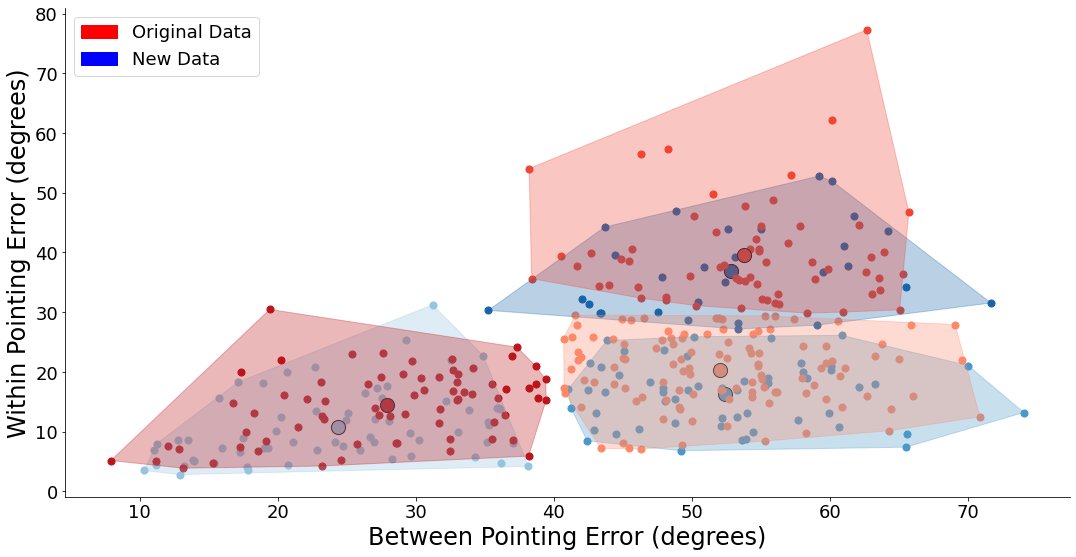

In [187]:
# Run the function  

new_color='blue'
new_label='New Data'
orig_color='red'
orig_label='Original Data'

ax,kmeans_new = kMeansSilcton(new,new_label,ax=[],color=new_color,
                     between='bad_pointing_coding_between',within='bad_pointing_coding_within')

ax,kmeans_original = kMeansSilcton(original,orig_label,ax=ax,color=orig_color,
                     between='bad_pointing_coding_between',within='bad_pointing_coding_within')

orig_patch = mpatches.Patch(color=orig_color, label=orig_label)
new_patch = mpatches.Patch(color=new_color,label=new_label)

plt.legend(handles=[orig_patch,new_patch])




output = os.path.join(figDir,'cluster_old_new.png')


if savefig:
    plt.savefig(output)
plt.show()


In [194]:
bad_zero = 2
bad_one = 1
bad_two = 0

kmeans_new.labels_ = np.where(kmeans_new.labels_ == bad_zero, 1000, kmeans_new.labels_)
kmeans_new.labels_ = np.where(kmeans_new.labels_ == bad_one, 111, kmeans_new.labels_)
kmeans_new.labels_ = np.where(kmeans_new.labels_ == bad_two, 222, kmeans_new.labels_)

kmeans_original.labels_ = np.where(kmeans_original.labels_ == 0, 1000, kmeans_original.labels_)
kmeans_original.labels_ = np.where(kmeans_original.labels_ == 1, 111, kmeans_original.labels_)
kmeans_original.labels_ = np.where(kmeans_original.labels_ == 2, 222, kmeans_original.labels_)

new['kmeans_bad'] = kmeans_new.labels_

original['kmeans_bad'] = kmeans_original.labels_


print(new.groupby(['kmeans_bad'])['bad_pointing_coding_between'].mean(), new.groupby(['kmeans_bad'])['bad_pointing_coding_within'].mean())
print(original.groupby(['kmeans_bad'])['bad_pointing_coding_between'].mean(),original.groupby(['kmeans_bad'])['bad_pointing_coding_within'].mean())


print(new.groupby(['kmeans_bad'])['SBSOD'].mean())
print(original.groupby(['kmeans_bad'])['SBSOD'].mean())

print(new.groupby(['kmeans_bad'])['MRT'].mean())
print(original.groupby(['kmeans_bad'])['MRT'].mean())

kmeans_bad
111     24.339204
222     52.387442
1000    52.860423
Name: bad_pointing_coding_between, dtype: float64 kmeans_bad
111     10.728666
222     16.256322
1000    36.862904
Name: bad_pointing_coding_within, dtype: float64
kmeans_bad
111     27.935607
222     52.051321
1000    53.802089
Name: bad_pointing_coding_between, dtype: float64 kmeans_bad
111     14.375783
222     20.339333
1000    39.622168
Name: bad_pointing_coding_within, dtype: float64
kmeans_bad
111     4.302804
222     4.059333
1000    3.737701
Name: SBSOD, dtype: float64
kmeans_bad
111     4.774647
222     4.316819
1000    3.836666
Name: SBSOD, dtype: float64
kmeans_bad
111     34.088889
222     23.103448
1000    10.941176
Name: MRT, dtype: float64
kmeans_bad
111    NaN
222    NaN
1000   NaN
Name: MRT, dtype: float64


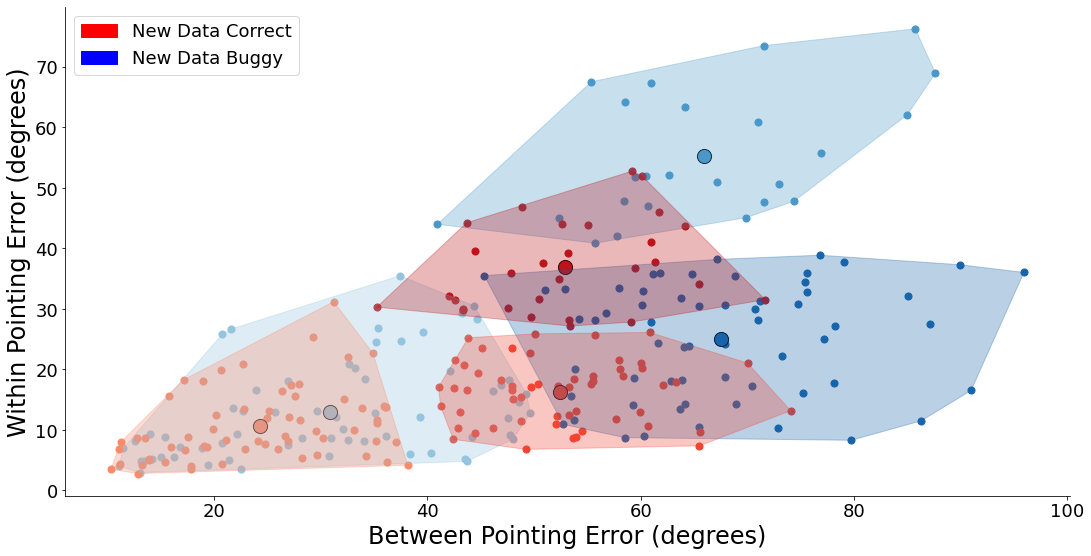

Good labels
[2 0 0 0 2 2 0 2 2 0 0 2 0 0 1 1 2 1 0 0 2 1 2 0 0 0 0 0 1 2 2 2 0 2 0 0 1
 0 2 1 0 2 0 2 0 0 0 2 0 1 1 0 1 0 2 0 1 1 1 2 0 2 1 1 1 2 0 2 0 2 0 2 2 1
 0 0 0 2 0 0 0 0 1 0 2 0 2 2 0 2 0 2 0 0 1 2 2 0 2 0 0 2 2 0 1 2 1 2 2 0 0
 0 2 2 0 2 0 2 0 2 2 2 2 2 0 0 0 2 1 2 0 2 0 2 0 2 1 2 2 2 0 2 2 2 0 2 1]
Bad labels
[1 0 0 0 1 0 0 0 1 0 0 1 0 0 2 2 1 2 0 0 1 2 1 0 0 0 0 0 2 1 1 1 0 1 0 0 2
 0 1 2 0 1 0 2 0 0 0 1 0 2 0 0 2 0 1 0 2 2 2 1 0 1 2 2 2 1 0 1 0 1 0 1 1 2
 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 2 1 1 0 1 0 0 1 1 0 2 1 2 1 1 1 0
 0 1 1 0 1 0 2 0 1 1 1 1 1 0 0 0 1 2 2 0 1 0 1 0 2 2 1 1 2 0 1 1 2 0 2 2]


80

In [145]:
# Run the function  

new_color='blue'
new_label='New Data Buggy'
orig_color='red'
orig_label='New Data Correct'

ax,kmeans_good = kMeansSilcton(new,new_label,ax=[],color=new_color,
                               between='good_pointing_coding_between',within='good_pointing_coding_within')

ax,kmeans_bad = kMeansSilcton(new,new_label,ax=ax,color=orig_color,
                              between='bad_pointing_coding_between',within='bad_pointing_coding_within')

orig_patch = mpatches.Patch(color=orig_color, label=orig_label)
new_patch = mpatches.Patch(color=new_color,label=new_label)

plt.legend(handles=[orig_patch,new_patch])

plt.show()

print('Good labels')
print(kmeans_good.labels_)
print('Bad labels')
print(kmeans_bad.labels_)
len(np.where(kmeans_good.labels_ != kmeans_bad.labels_)[0])



16 participants are assigned different categories


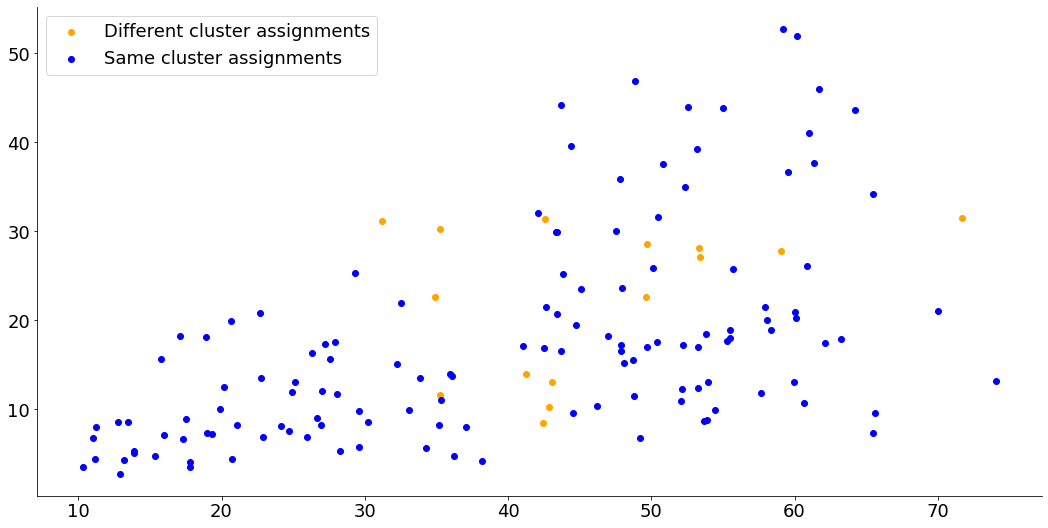

In [133]:
bad_zero = 2
bad_one = 1
bad_two = 0

kmeans_good.labels_ = np.where(kmeans_good.labels_ == bad_zero, 1000, kmeans_good.labels_)
kmeans_good.labels_ = np.where(kmeans_good.labels_ == bad_one, 111, kmeans_good.labels_)
kmeans_good.labels_ = np.where(kmeans_good.labels_ == bad_two, 222, kmeans_good.labels_)

kmeans_bad.labels_ = np.where(kmeans_bad.labels_ == 0, 1000, kmeans_bad.labels_)
kmeans_bad.labels_ = np.where(kmeans_bad.labels_ == 1, 111, kmeans_bad.labels_)
kmeans_bad.labels_ = np.where(kmeans_bad.labels_ == 2, 222, kmeans_bad.labels_)

print(f'{len(np.where(kmeans_good.labels_ != kmeans_bad.labels_)[0])} participants are assigned different categories')

diff = np.where(kmeans_good.labels_ != kmeans_bad.labels_)
same = np.where(kmeans_good.labels_ == kmeans_bad.labels_)

fig,ax = plt.subplots(figsize=(18,9))

ax.scatter(new.iloc[diff]['bad_pointing_coding_between'],new.iloc[diff]['bad_pointing_coding_within'],
           color='orange',label='Different cluster assignments')
ax.scatter(new.iloc[same]['bad_pointing_coding_between'],new.iloc[same]['bad_pointing_coding_within'],
           color='blue',label='Same cluster assignments')

plt.legend()
plt.show()

#ax.scatter(new.iloc[diff]['good_pointing_coding_between'],new.iloc[diff]['good_pointing_coding_within'],color='orange',s=100)
#ax.scatter(new.iloc[same]['good_pointing_coding_between'],new.iloc[same]['good_pointing_coding_within'],color='blue',s=100)

In [141]:
new['kmeans_good'] = kmeans_good.labels_
new['kmeans_bad'] = kmeans_bad.labels_

print(new.groupby(['kmeans_good'])['participant'].count())
print(new.groupby(['kmeans_bad'])['participant'].count())

print(new.groupby('kmeans_good')['good_pointing_coding_between'].mean())
print(new.groupby('kmeans_bad')['good_pointing_coding_within'].mean())

print(new.groupby('kmeans_good')['SBSOD'].mean())
print(new.groupby('kmeans_bad')['SBSOD'].mean())

print(new.groupby('kmeans_good')['MRT'].mean())
print(new.groupby('kmeans_bad')['MRT'].mean())

print(new.groupby(['kmeans_good','gender'])['participant'].count())
print(new.groupby(['kmeans_bad','gender'])['participant'].count())

kmeans_good
111     63
222     24
1000    60
Name: participant, dtype: int64
kmeans_bad
111     63
222     29
1000    55
Name: participant, dtype: int64
kmeans_good
111     30.834511
222     65.881911
1000    67.535364
Name: good_pointing_coding_between, dtype: float64
kmeans_bad
111     13.825088
222     51.070880
1000    23.494352
Name: good_pointing_coding_within, dtype: float64
kmeans_good
111     4.348360
222     3.902500
1000    3.918778
Name: SBSOD, dtype: float64
kmeans_bad
111     4.302804
222     3.737701
1000    4.059333
Name: SBSOD, dtype: float64
kmeans_good
111     34.930233
222      9.222222
1000    24.066667
Name: MRT, dtype: float64
kmeans_bad
111     34.088889
222     10.941176
1000    23.103448
Name: MRT, dtype: float64
kmeans_good  gender
111          Female    34
             Male      29
222          Female    21
             Male       3
1000         Female    41
             Male      19
Name: participant, dtype: int64
kmeans_bad  gender
111         Female    33

## Canonical plot - Original vs. New Data

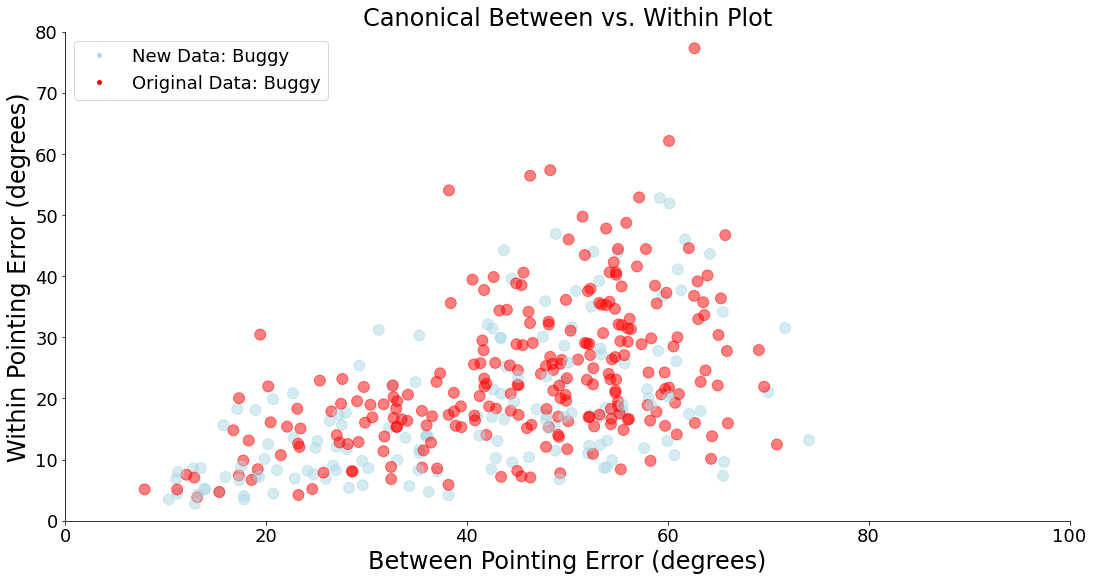

In [30]:
# Set up a list of colors for each type of data
new_old_categories = ['New','Original']
new_old_colors = ['lightblue','red','blue']
new_old_colordict = dict(zip(new_old_categories, new_old_colors))
participantData["Color"] = participantData['New_or_Original'].apply(lambda x: new_old_colordict[x])

labels = ['New Data: Buggy', 'Original Data: Buggy', 'New Data: Correct']

# Set up legend elements for the canonical plots
canonical_legend = [plt.Line2D([0], [0], marker='o',color='w',markerfacecolor=new_old_colors[0], label=labels[0]),
                   plt.Line2D([0], [0], marker='o',color='w',markerfacecolor=new_old_colors[1], label=labels[1])]



#%% FIGURES: COMPARE OLD AND NEW

# Just canonical bad coding
fig,ax = plt.subplots(figsize=(18,9))

ax = plt.scatter(participantData['bad_pointing_coding_between'],
                 participantData['bad_pointing_coding_within'],
                 c=participantData["Color"],alpha=.5,s=120)

plt.xlabel("Between Pointing Error (degrees)")
plt.ylabel("Within Pointing Error (degrees)")
plt.axis([0, 100, 0, 80])
plt.legend(handles=canonical_legend,loc='upper left')
plt.title('Canonical Between vs. Within Plot')

if savefig:
    plt.savefig(os.path.join(figDir,'canonicalPlot_Original_vs_New.png'))

plt.show()



## Canonical Plot - Correct vs. Buggy 


Now let's add the correct coding on there and see how things change. 

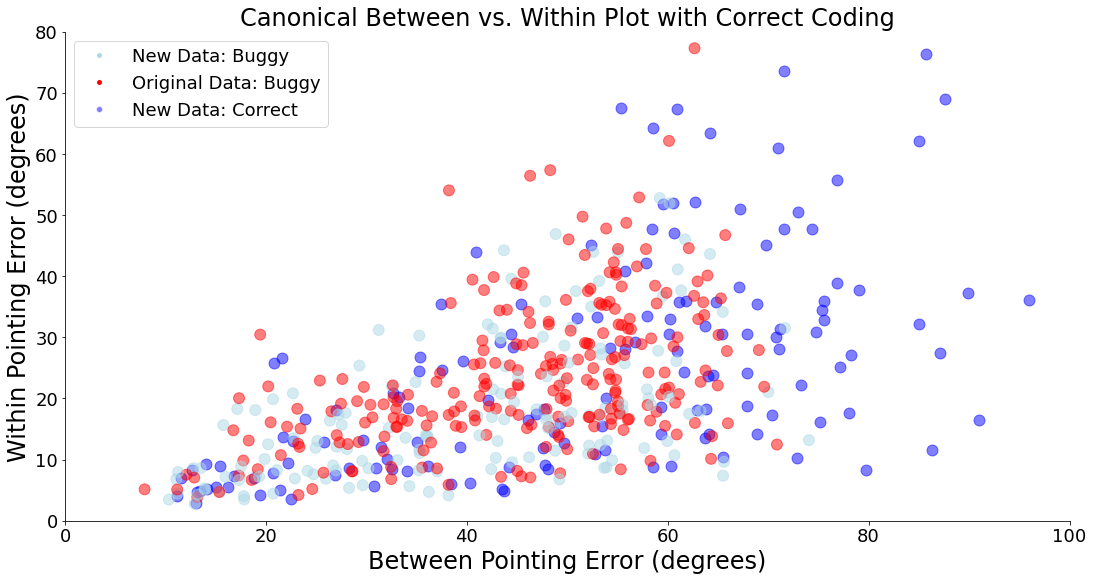

In [31]:
# Bad AND good coding
fig, ax = plt.subplots(figsize=(18,9))

# Set up legend elements for the canonical plots
canonical_legend_corrected = [plt.Line2D([0], [0], marker='o',color='w',markerfacecolor=new_old_colors[0], label=labels[0]),
                   plt.Line2D([0], [0], marker='o',color='w',markerfacecolor=new_old_colors[1], label=labels[1]),
                   plt.Line2D([0], [0], marker='o',color='w',markerfacecolor=new_old_colors[2],label=labels[2],alpha=.5)]

ax = plt.scatter(avgNew['good_pointing_coding_between'],
                 avgNew['good_pointing_coding_within'],
                 c='blue',alpha=.5,s=120)

ax = plt.scatter(participantData['bad_pointing_coding_between'],
                 participantData['bad_pointing_coding_within'],
                 c=participantData["Color"],alpha=.5,s=120)
            
plt.xlabel("Between Pointing Error (degrees)")
plt.ylabel("Within Pointing Error (degrees)")
plt.axis([0, 100, 0, 80])
plt.legend(handles=canonical_legend_corrected, loc='upper left')
plt.title('Canonical Between vs. Within Plot with Correct Coding')

if savefig:
    plt.savefig(os.path.join(figDir,'canonicalPlot_Original_vs_New_withCorrect.png'))

plt.show()

So, the blue dots are much more stretched out to the right. 

<div class="alert alert-block alert-info">
<b>Note:</b> The pink dots don't have blue counterparts. Remember that we can't recreate the old data).</div> 

## Canonical Plot: Correct vs. Buggy within-subject

These are within-participant calculations. So let's see what happens when we connect each buggy coding red dot to its counterpart blue dot. 

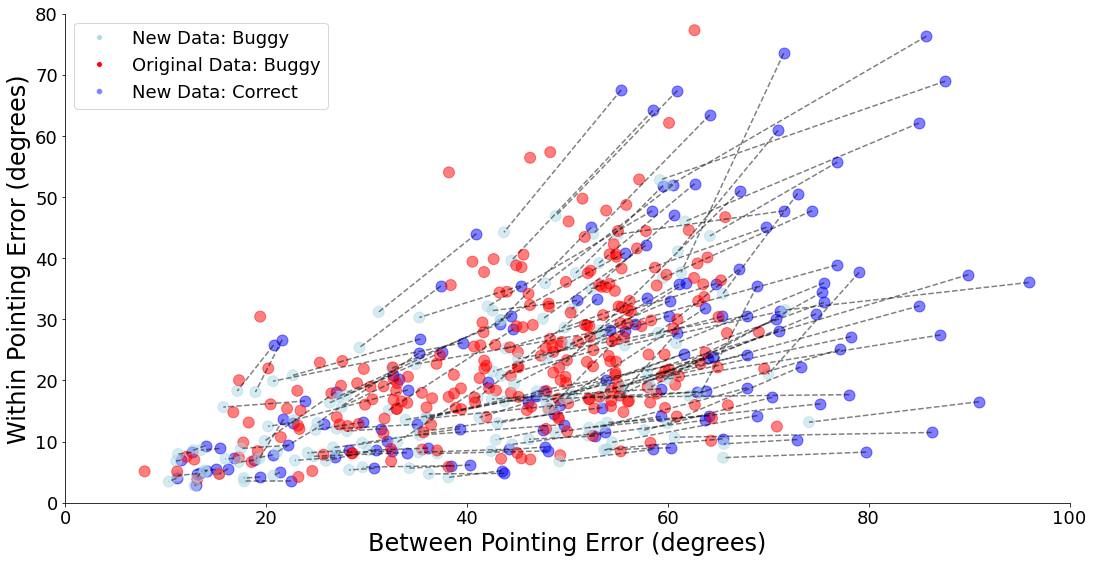

In [32]:
# Comparing good and bad coding with lines
fig, ax = plt.subplots(figsize=(18,9))

ax = plt.scatter(avgNew['good_pointing_coding_between'],
                 avgNew['good_pointing_coding_within'],
                 c='blue',alpha=.5,s=120)

ax = plt.scatter(participantData['bad_pointing_coding_between'],
                 participantData['bad_pointing_coding_within'],
                 c=participantData["Color"],alpha=.5,s=120)
           
# Plot a line connecting each participant's good and bad coding dots. 
for index,row in participantData.iterrows():
      plt.plot([row['good_pointing_coding_between'],
                row['bad_pointing_coding_between']], 
               [row['good_pointing_coding_within'],
                row['bad_pointing_coding_within']], 
               c='black',alpha=.5,linestyle='--')

plt.xlabel("Between Pointing Error (degrees)")
plt.ylabel("Within Pointing Error (degrees)")
plt.axis([0, 100, 0, 80])
plt.legend(handles=canonical_legend_corrected, loc='upper left')

if savefig:
    plt.savefig(os.path.join(figDir,'canonicalPlot_Original_vs_New_withCorrect_lines.png'))

plt.show()

## Arrows Plot: Correct vs. Buggy within-subject

Let's remove all the points and just compare the movement of each participant's data on this scatterplot. 

The beginning of each arrow represents the buggy coding. The end of the arrow is the correct coding. The length of the arrow (and the color of the arrow) is the difference across between and within pointing averages that the bug caused. 


<div class="alert alert-block alert-info">
<b>Note:</b> All the lines move up and to the right - the bug made all pointing errors lower. Also, notice how the arrows seem to get longer the worse that participant did. We'll come back to that.</div> 


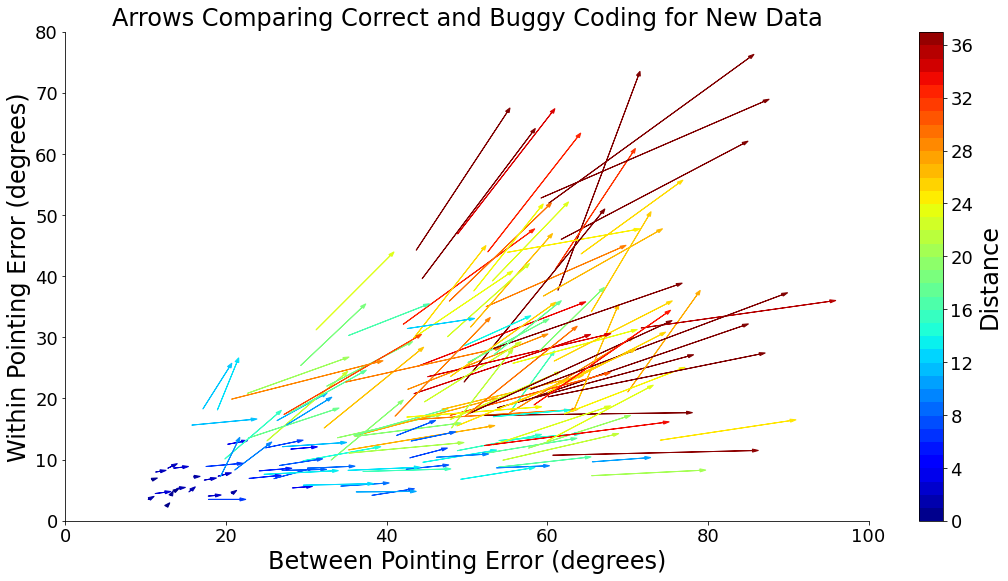

In [12]:
# Arrows Figure 
fig, ax = plt.subplots(figsize=(18,9))

cmap = plt.cm.jet
# Initialize distance and set maxDistance (to allow coloring each line)
avgNew['distance'] = 0
maxDistance = 6616 # Saved after running once

for index,row in avgNew.iterrows():      
     
      # Set good and bad vectors for easier handling
    goodVec = [row['good_pointing_coding_between'],row['good_pointing_coding_within']]
    badVec = [row['bad_pointing_coding_between'],row['bad_pointing_coding_within']]
      
    dx = goodVec[0] - badVec[0]
    dy = goodVec[1] - badVec[1]
      
    distance = np.sqrt( ((goodVec[0]-badVec[0])**2)+((goodVec[1]-badVec[1])**2) )
    avgNew.loc[index,'distance'] = distance
      
    # 255 is just to get the colors right, normalized by max distance. 
    distance = (distance/maxDistance)*255
     
    # Plot the arrow pointing from bad coding to good coding
    plt.arrow(row['bad_pointing_coding_between'],
        row['bad_pointing_coding_within'],
        dx, dy, shape='full', lw=1, 
        length_includes_head=True, 
        head_width=.5, color = cmap(distance))

plt.xlabel("Between Pointing Error (degrees)")
plt.ylabel("Within Pointing Error (degrees)")


norm = plt.matplotlib.colors.Normalize(vmin=0,vmax=max(avgNew['distance']))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,boundaries=np.arange(0,max(avgNew['distance'])),label='Distance')
plt.axis([0, 100, 0, 80])

plt.title('Arrows Comparing Correct and Buggy Coding for New Data')

if savefig:
    plt.savefig(os.path.join(figDir,'arrowsPlot_buggy_vs_correct.png'))

plt.show()

## Deviation Plot: Correct vs. Buggy

Now we can compare each participant's within and between pointing average for correct and buggy coding. 

The more a point deviates off the black line (the reference line, where Buggy coding = Correct coding), the worse it was affected by the bug. 

This plot confirms that the buggy coding "shinks" errors with respect to correct coding (in fact, all points lie above the y=x line). 

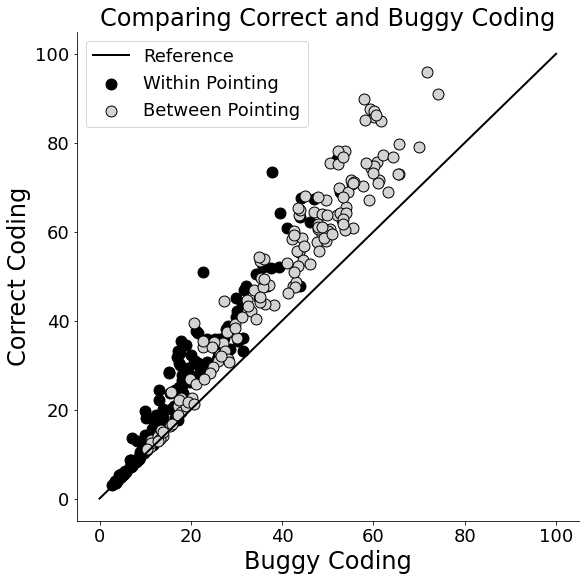

In [13]:
#%% FIGURE: Deviation from perfect coding by averaged pointing judgments
fig, ax = plt.subplots(figsize=(9,9))

ax = plt.scatter(avgNew['bad_pointing_coding_within'],
                 avgNew['good_pointing_coding_within'],
                 c='black',label='Within Pointing',s=120,edgecolors= "black")

ax = plt.scatter(avgNew['bad_pointing_coding_between'],
                 avgNew['good_pointing_coding_between'],
                 c='lightgrey',label='Between Pointing',s=120,edgecolors= "black")

# Plot the reference line where good/bad coding would be equal.
refLine = np.linspace(0, 100, 1000)
ax = plt.plot(refLine,refLine,c='black',linewidth=2,label='Reference');

plt.xlabel("Buggy Coding")
plt.ylabel("Correct Coding")
plt.legend(loc='upper left')
plt.title('Comparing Correct and Buggy Coding')

if savefig:
    plt.savefig(os.path.join(figDir,'comparing_correct_buggy.png'))

plt.show()

### Comparing Buggy and Correct within the new data set

A few quick stats show that although the difference between buggy and correct exists, and that participant performance is correlated with the amount of change, the correlations (Pearson and Spearman) are extraordinarily high. 

In [14]:
# Determine the partial correlation of bad between pointing with distance partialling out within.
# Using this to see if I need to look separately for between/within pointing routes for this. 
# The answer appears to be yes. 
pg.partial_corr(data=avgNew, 
                x='bad_pointing_coding_between', 
                y='distance', 
                covar='bad_pointing_coding_within').round(3)


,n,r,CI95%,p-val
pearson,147,0.517,"[0.39, 0.63]",0.0


In [15]:
avgOriginal = participantData[participantData['New_or_Original']=='Original']
avgOriginal = avgOriginal[avgOriginal['SBSOD'].notna()]

for i in ['bad_pointing_coding_between','bad_pointing_coding_within']:
    [t,p] = stats.ttest_ind(avgNew[i],avgOriginal[i])
    avgNewMean = avgNew[i].mean()
    avgOriginalMean = avgOriginal[i].mean()
    print(f'{i}: New Avg = {avgNewMean:.2f} | Orig Avg = {avgOriginalMean:.2f} | T-val = {t:.2f},p < {p:.5f}\n')

withinR,p = stats.pearsonr(avgNew['bad_pointing_coding_within'],
             avgNew['good_pointing_coding_within'])

betweenR,p = stats.pearsonr(avgNew['bad_pointing_coding_between'],
                 avgNew['good_pointing_coding_between'])

withinRanks,p = stats.spearmanr(avgNew['bad_pointing_coding_within'],
                 avgNew['good_pointing_coding_within'])

betweenRanks,p = stats.spearmanr(avgNew['bad_pointing_coding_between'],
                 avgNew['good_pointing_coding_between'])


bugCorrectBetween,p = stats.pearsonr(avgNew['bad_pointing_coding_between'],
                 avgNew['distance'])

bugCorrectWithin,p = stats.pearsonr(avgNew['bad_pointing_coding_within'],
                 avgNew['distance'])


print(f"The amount of change for between and within pointing average correlates with participant performance\n" + 
      f"Worse pointers were more affected by the bug.\n" + 
     f"Within: R = {bugCorrectWithin:.4f}\n" + 
      f"Between: R = {bugCorrectBetween:.4f}\n") 



print(f"Correlations between Buggy and Correct coding at the participant level were very high.\n" + 
     f"Within: Pearson's R = {withinR:.2f}; Spearman's R = {withinRanks:.2f}\n" + 
     f"Between: Pearson's R = {betweenR:.2f}; Spearman's R = {betweenRanks:.2f}\n")

bad_pointing_coding_between: New Avg = 40.46 | Orig Avg = 45.32 | T-val = -3.19,p < 0.00153

bad_pointing_coding_within: New Avg = 17.95 | Orig Avg = 23.31 | T-val = -4.43,p < 0.00001

The amount of change for between and within pointing average correlates with participant performance
Worse pointers were more affected by the bug.
Within: R = 0.6879
Between: R = 0.6882

Correlations between Buggy and Correct coding at the participant level were very high.
Within: Pearson's R = 0.97; Spearman's R = 0.98
Between: Pearson's R = 0.97; Spearman's R = 0.96



## Changes in other findings

These graphs and statistics show that: 

1) There was a bug that affected participant-level data. 

2) The effects of the bug are worse for participants who did worse on the pointing task. 

Did the changes in the pointing task affect any other measures? (For descriptions of other measures, see the [documentation](http://stevenmweisberg.com/Virtual_Silcton_Documentation/other-measure-descriptions.html).

### Plotting function

New Data: Correct: r(147) = -0.26, p = 0.0016
New Data: Buggy: r(147) = -0.24, p = 0.0033



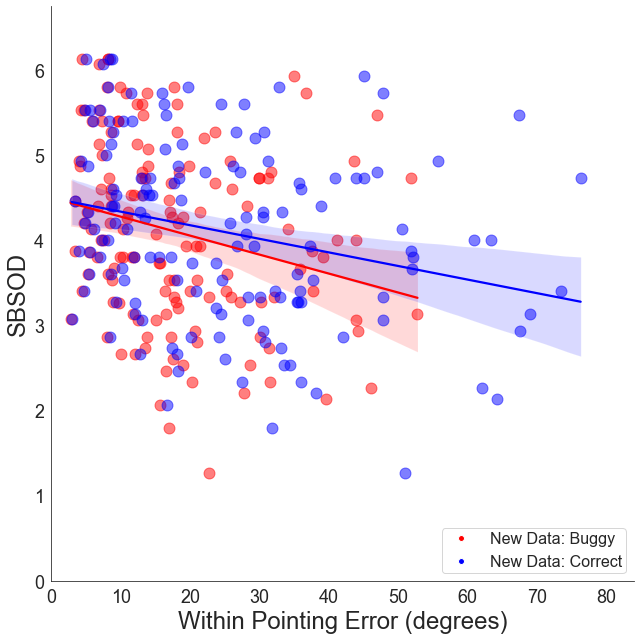

In [16]:
def plotCorrComparison(y,pointingType,data=avgNew,savefig=savefig,output=output,loc='lower right'):
    # Plot a scatterplot comparing original and corrected data (same dataset)
    
    
    
    # Create labels to use for these plots
    title = 'Pointing Coding'
    new_labels = ['Correct Coding', 'Buggy Coding']

    sns.set_style('white', {'font.family':'sans-serif', 'font.sans-serif':'Arial'})
    # Create longform data
    participantData_Long = pd.melt(data, 
                            id_vars=['participant',y],
                            value_vars=['good_pointing_coding_'+pointingType,
                                        'bad_pointing_coding_'+pointingType])
    
    # calculate Pearson's correlation
    bugCorr,bugP = stats.pearsonr(data['bad_pointing_coding_'+pointingType],
                                  data[y])
    
    actualCorr,actualP = stats.pearsonr(data['good_pointing_coding_'+pointingType],
                                        data[y])
    
    # Create plot object
    plotObj = sns.lmplot(x="value", y=y,hue='variable',
                         data=participantData_Long,
                         legend_out=False,fit_reg=True,
                         height=9, aspect=9/9,
                         scatter_kws={'alpha': 0.5, 's':120},
                         palette = sns.color_palette(palette = ["red" , "blue"]),
                         hue_order = ['bad_pointing_coding_'+pointingType, 'good_pointing_coding_'+pointingType])
    
    plt.legend(loc=loc, labels=['New Data: Buggy', 'New Data: Correct'],fontsize=16,
               handles=[plt.Line2D([0], [0], marker='o',color='w',markerfacecolor='red'),
                        plt.Line2D([0], [0], marker='o',color='w',markerfacecolor='blue')],borderpad=.2)

               
    plotObj.set_axis_labels(pointingType.capitalize() +" Pointing Error (degrees)",y)
    
    
    # Set axis limits
    lowerY = min(min(data[y]*1.1),0)
    upperY = max(data[y]*1.1)

    plotObj.set(ylim=(lowerY,upperY))
    plotObj.set(xlim=(0, max(data['good_pointing_coding_'+pointingType])*1.1))
    
    # Set annotation locations
    yAnnotation1 = (upperY - lowerY)/100*2
    yAnnotation2 = ((upperY - lowerY)/100)*8

    #plotObj.axes[0,0].annotate(f'New Data: Correct: r({len(data)}) = {actualCorr:.2f}, p = {actualP:.4f}', xy=(1,yAnnotation1),fontsize=14)
    #plotObj.axes[0,0].annotate(f'New Data: Buggy: r({len(data)}) = {bugCorr:.2f}, p = {bugP:.4f}', xy=(1,yAnnotation2),fontsize=14)
    
    print(f'New Data: Correct: r({len(data)}) = {actualCorr:.2f}, p = {actualP:.4f}\nNew Data: Buggy: r({len(data)}) = {bugCorr:.2f}, p = {bugP:.4f}\n')
    
    if savefig:
        plt.savefig(output, bbox_inches="tight")
    
    
    plt.show()
    
y = 'SBSOD'
pointingType = 'within'
output = os.path.join(figDir,f'{y}_{pointingType}_correlation_comparison.png')

plotCorrComparison(y,pointingType,output=output)

New Data: Correct: r(147) = -0.16, p = 0.0509
New Data: Buggy: r(147) = -0.14, p = 0.0948



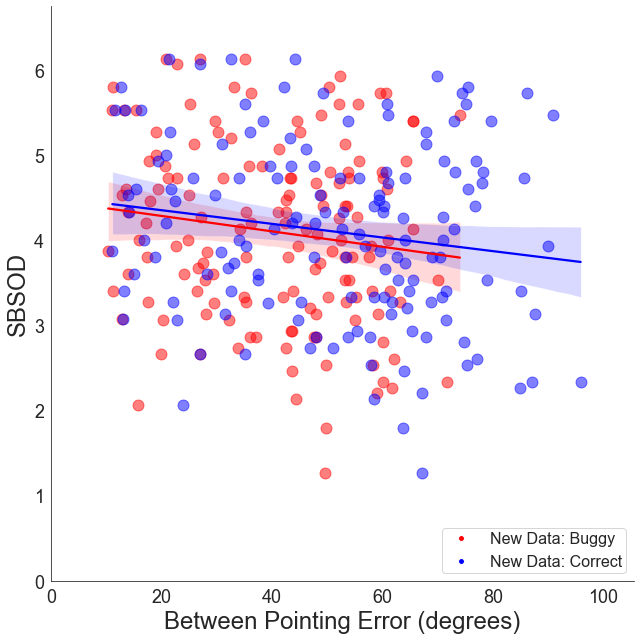

In [17]:
y = 'SBSOD'
pointingType = 'between'
output = os.path.join(figDir,f'{y}_{pointingType}_correlation_comparison.png')

plotCorrComparison(y,pointingType,output=output)

New Data: Correct: r(91) = -0.44, p = 0.0000
New Data: Buggy: r(91) = -0.45, p = 0.0000



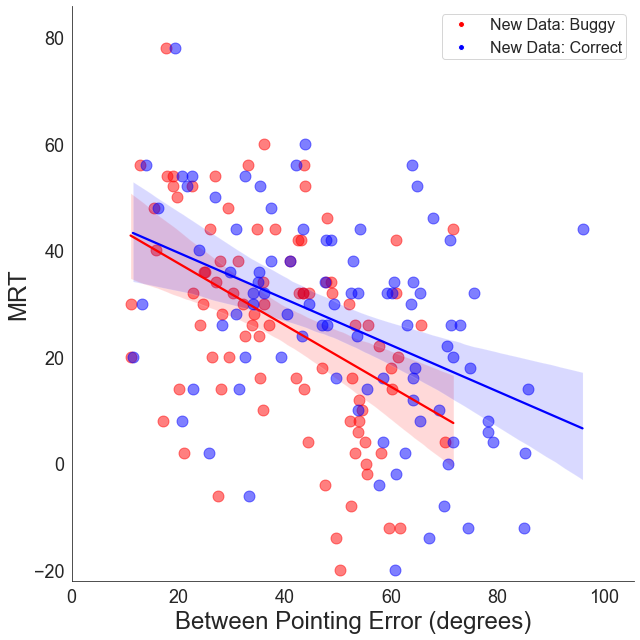

New Data: Correct: r(91) = -0.42, p = 0.0000
New Data: Buggy: r(91) = -0.42, p = 0.0000



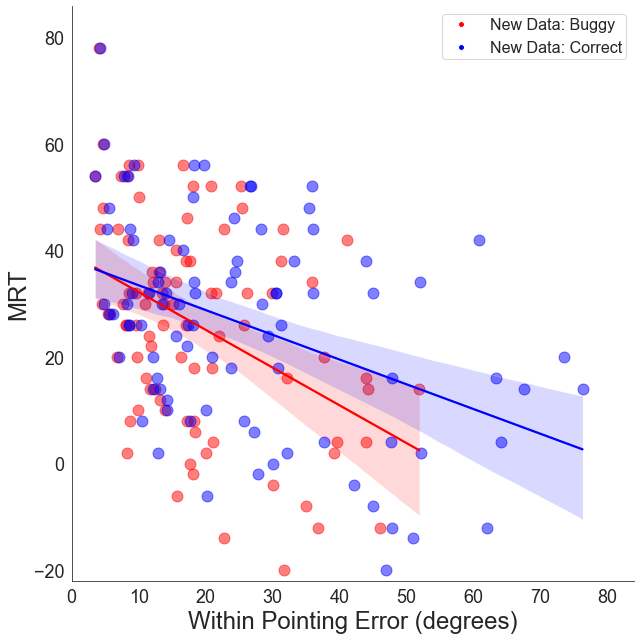

In [18]:
avgNewDropMRTNa = avgNew[avgNew['MRT'].notna()]

y = 'MRT'
pointingType = 'between'
output = os.path.join(figDir,f'{y}_{pointingType}_correlation_comparison.png')

plotCorrComparison(y,pointingType,data=avgNewDropMRTNa,output=output,loc='upper right')

pointingType = 'within'
output = os.path.join(figDir,f'{y}_{pointingType}_correlation_comparison.png')

plotCorrComparison(y,pointingType,data=avgNewDropMRTNa,output=output,loc='upper right')
   

# Can re-run without outlier, but it makes no difference
# avgNewDropMRTNa_NoOutlier = avgNewDropMRTNa[avgNewDropMRTNa['MRT']<75]


## Reanalysis of Previous Silcton Data

In [146]:
# First, we apply a correction on the existing data. 

baseDir = '../ReanalysisData'

# Training_Data.csv is the data used to train the model.
# These data were coded to have both buggy data AND corrected data, and are used to train the regression model. 
df_train_path = os.path.join(baseDir,'Training_Data.csv')

df_train = pd.read_csv(df_train_path, encoding = 'unicode_escape', sep = ",")

# We train only on new data
df_train = df_train[df_train.New_or_Original=='New']

# Separate models for within and between 
X_train_within = df_train[['bad_pointing_coding_within']]
y_train_within = df_train[['good_pointing_coding_within']]


within_model = linear_model.LinearRegression()
within_model.fit(X_train_within,y_train_within)

X_train_between = df_train[['bad_pointing_coding_between']]
y_train_between = df_train[['good_pointing_coding_between']]

between_model = linear_model.LinearRegression()
between_model.fit(X_train_between,y_train_between)

def applyCorrection(df,within='Within_Pointing',between='Between_Pointing',within_model=within_model,between_model=between_model):

    # Now calculate participant and within/between averages. 
    within_buggy = df[[within]]
    between_buggy = df[[between]]
    
    # Filter out the nans
    within_buggy_filter = within_buggy.isna()
    between_buggy_filter = between_buggy.isna()
    
    # Create a copy of each of these
    within_corrected = within_buggy.copy()
    between_corrected = between_buggy.copy()
    
    # we store in an array all predicted (corrected) angles
    within_corrected[~within_buggy_filter[within]] = within_model.predict(within_buggy[~within_buggy_filter[within]])
    between_corrected.loc[~between_buggy_filter[between]] = between_model.predict(between_buggy[~between_buggy_filter[between]])

    
    return within_corrected,between_corrected


def plotCorrection(within_buggy,between_buggy,within_corrected,between_corrected,savefig=savefig,output=output):
    
    # Set up legend elements for the canonical plots
    canonical_legend_old = [plt.Line2D([0], [0], marker='o',color='w',markerfacecolor='red', label='Old Data: Buggy'),
                   plt.Line2D([0], [0], marker='o',color='w',markerfacecolor='blue', label='Old Data: Corrected')]

    fig, ax = plt.subplots(figsize=(18,9))
    
    ax.set_xlabel("Within Pointing Error (Degrees)")
    ax.set_ylabel("Between Pointing Error (Degrees)")
    
    ax.scatter(between_corrected,within_corrected, 
               c='blue',alpha=.5,s=120,label='Old Data: Corrected')
    ax.scatter(between_buggy,within_buggy,
               c='red',alpha=.5,s=120,label='Old Data: Buggy')
    
    ax.set_xlim([0,100])
    ax.set_ylim([0,90])

    ax.legend(handles=canonical_legend_old, loc='upper left')

    if savefig:
        plt.savefig(output)

    plt.show()
        

## JEP:LMC 2016 Reanalysis

In [147]:

# Load in dataset part 1
df_1 = pd.read_spss(os.path.join(baseDir,'Weisberg_Dissertation','Dissertation_Part_1_Master_Spring_1.sav'))
df_1 = df_1[df_1['Within_Pointing'].notna()]
df_1 = df_1[df_1['Between_Pointing'].notna()]
# Load in dataset part 2
df_2 = pd.read_spss(os.path.join(baseDir,'Weisberg_Dissertation','Dissertation_Part_2_Master_1.sav'))
df_2 = df_2[df_2['Within_Pointing'].notna()]
df_2 = df_2[df_2['Between_Pointing'].notna()]


# Replicate a few analyses from JEPLMC 2016 paper

# Correlation between OSpan and SymSpan
print(f'Correlation between OSpan total and SymSpan total: {np.ma.corrcoef(np.ma.masked_invalid(df_1.OSpan_Total),np.ma.masked_invalid(df_1.SymSpan_Total))[1,0]}')

# Group means and SDs for route membership task
display(df_1.groupby('Pointing_Groups_Intrinsic')['Num_Correct'].mean()/64)
display(df_1.groupby('Pointing_Groups_Intrinsic')['Num_Correct'].std()/64)

display(df_2.groupby('Pointing_Clusters_Intrinsic')['Shortcut_Goals_Found'].mean())
display(df_2.groupby('Pointing_Clusters_Intrinsic')['Shortcut_Goals_Found'].std())


Correlation between OSpan total and SymSpan total: 0.5718715346552216


Pointing_Groups_Intrinsic
Conf    0.653493
Int     0.913690
Non     0.813802
Name: Num_Correct, dtype: float64

Pointing_Groups_Intrinsic
Conf    0.157149
Int     0.092256
Non     0.198606
Name: Num_Correct, dtype: float64

Pointing_Clusters_Intrinsic
Confused           6.666667
Integrators        9.375000
Non-Integrators    9.000000
Name: Shortcut_Goals_Found, dtype: float64

Pointing_Clusters_Intrinsic
Confused           2.744692
Integrators        3.597251
Non-Integrators    3.671275
Name: Shortcut_Goals_Found, dtype: float64

Here we apply a correction by fitting a linear model

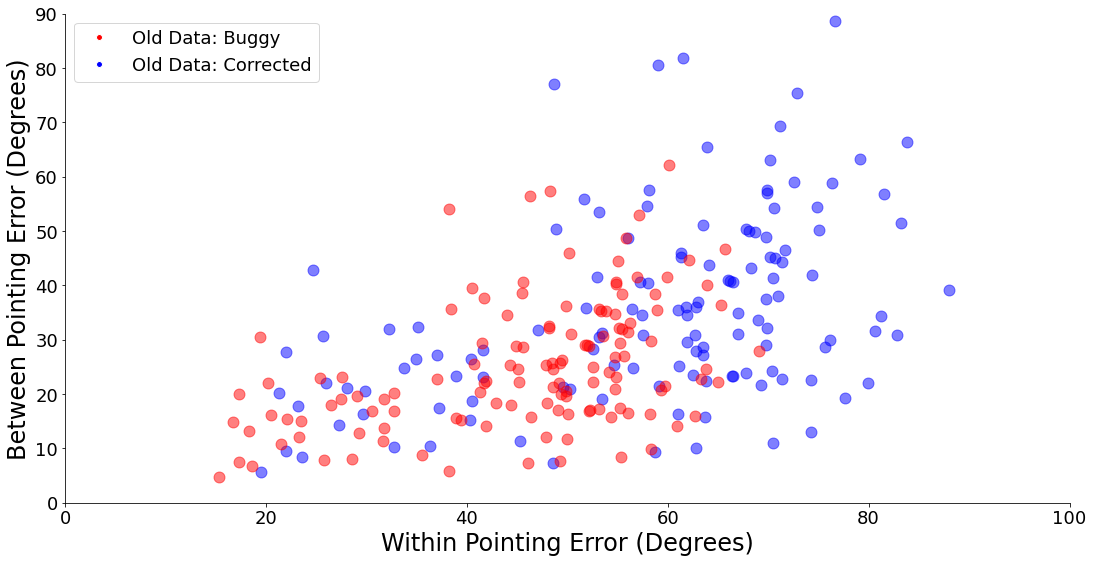

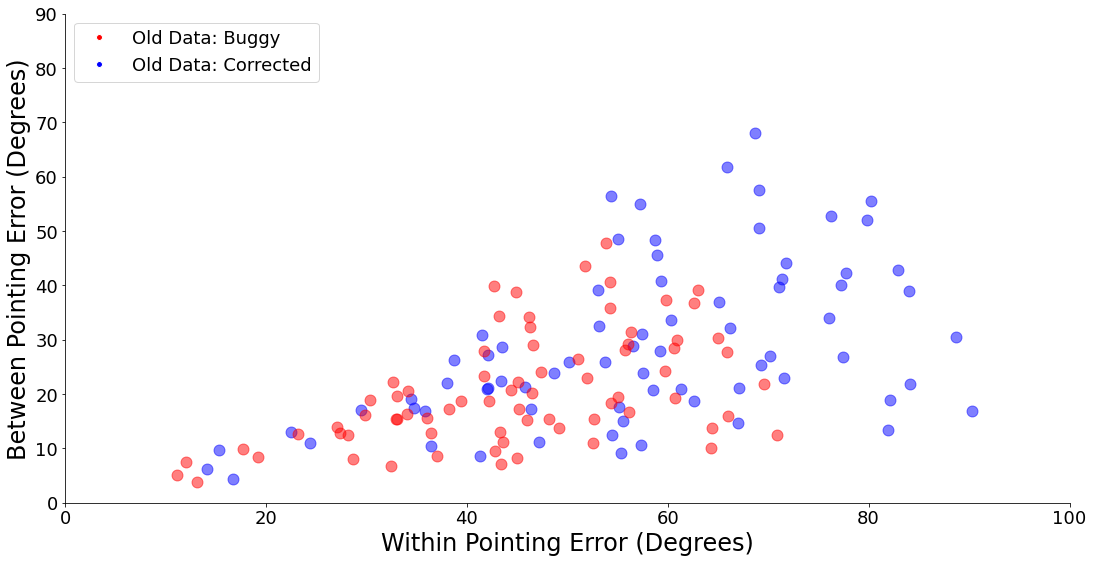

In [148]:

# Interpolate pointing data for Weisberg dissertation
study = 0
for df in df_1,df_2:
    study += 1 
    
    df['Within_Pointing_Corrected'],df['Between_Pointing_Corrected'] = applyCorrection(df)
    plotCorrection(df['Within_Pointing'],df['Between_Pointing'],
                   df['Within_Pointing_Corrected'],df['Between_Pointing_Corrected'],
                   savefig=savefig,output=os.path.join(figDir,f'Old_study_{study}_corrected.png'))



## Table 2 is unchanged 

In [22]:
columns = ['Within_Pointing','Between_Pointing','Goals_Using_Shortcut','Goals_Using_Route','Goals_Found','Model_Building_Within_average','Model_Building_Total']
column_names = ['Within Pointing', 'Between Pointing', 'Shortcut Goals', 'Route Goals', 'Goals Found', 'Within Model-building', 'Total Model-building']

table2_data = df_2[columns]
table2_original = np.ma.corrcoef(np.ma.masked_invalid(table2_data.T))

columns_corrected = ['Within_Pointing_Corrected','Between_Pointing_Corrected','Goals_Using_Shortcut','Goals_Using_Route','Goals_Found','Model_Building_Within_average','Model_Building_Total']

table2_data_corrected = df_2[columns_corrected]
table2_corrected = np.ma.corrcoef(np.ma.masked_invalid(table2_data_corrected.T))

display('Original Table 2')
display(pd.DataFrame(table2_original.round(2),columns=column_names,index=column_names))
display('Corrected Table 2')
display(pd.DataFrame(table2_corrected.round(2),columns=column_names,index=column_names))

'Original Table 2'

,Within Pointing,Between Pointing,Shortcut Goals,Route Goals,Goals Found,Within Model-building,Total Model-building
Within Pointing,1.00,0.50,-0.34,-0.13,-0.44,-0.16,-0.49
Between Pointing,0.50,1.00,-0.31,0.03,-0.27,-0.03,-0.57
Shortcut Goals,-0.34,-0.31,1.00,-0.33,0.58,0.00,0.19
Route Goals,-0.13,0.03,-0.33,1.00,0.50,0.05,0.01
Goals Found,-0.44,-0.27,0.58,0.50,1.00,0.13,0.24
Within Model-building,-0.16,-0.03,0.00,0.05,0.13,1.00,0.11
Total Model-building,-0.49,-0.57,0.19,0.01,0.24,0.11,1.00


'Corrected Table 2'

,Within Pointing,Between Pointing,Shortcut Goals,Route Goals,Goals Found,Within Model-building,Total Model-building
Within Pointing,1.00,0.50,-0.34,-0.13,-0.44,-0.16,-0.49
Between Pointing,0.50,1.00,-0.31,0.03,-0.27,-0.03,-0.57
Shortcut Goals,-0.34,-0.31,1.00,-0.33,0.58,0.00,0.19
Route Goals,-0.13,0.03,-0.33,1.00,0.50,0.05,0.01
Goals Found,-0.44,-0.27,0.58,0.50,1.00,0.13,0.24
Within Model-building,-0.16,-0.03,0.00,0.05,0.13,1.00,0.11
Total Model-building,-0.49,-0.57,0.19,0.01,0.24,0.11,1.00


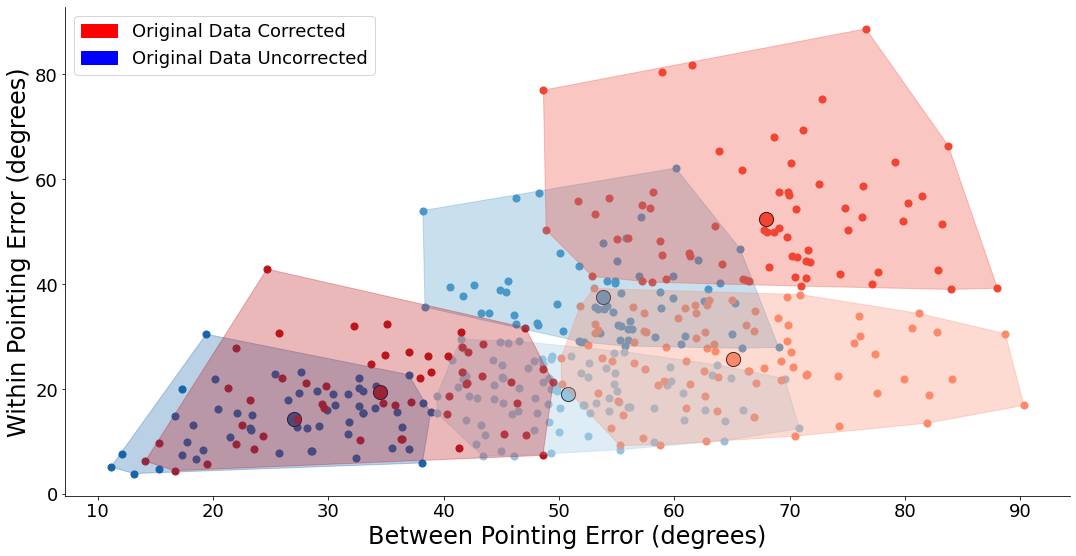

Good labels
[2 0 1 2 2 0 0 2 0 2 2 0 1 2 1 0 2 0 0 0 1 1 2 2 0 0 0 0 0 0 1 0 0 1 1 2 2
 2 0 2 2 2 2 0 0 0 1 0 0 0 0 2 0 2 2 2 1 2 2 1 1 0 2 0 2 2 0 1 2 2 0 2 1 2
 2 2 0 2 0 2 1 1 1 1 0 1 2 0 2 1 0 2 1 2 2 1 0 2 2 0 1 1 0 0 2 1 0 2 0 2 1
 2 1 2 2 0 1 0 2 2 2 2 2 1 2 1 1 2 0 2 0 2 2 2 2 1 2 0 0 2 1 2 1 0 1 0 2 2
 2 2 0 0 1 0 2 0 1 1 0 2 2 1 1 1 0 2 1 2 2 1 2 1 2 1 2 0 2 2 1 0 1 2 1 1 0
 1 0 0 0 1 1 2 2 2 1 0 2 2 1 0 2 2 2 2]
Bad labels
[2 0 1 2 2 0 0 2 0 2 2 0 1 0 1 0 2 0 0 0 1 1 2 2 0 0 0 0 0 0 1 0 0 1 1 2 2
 2 0 2 2 2 2 0 0 0 1 0 0 0 0 2 0 2 2 2 1 2 2 1 1 0 2 0 2 2 0 1 2 2 0 2 1 2
 2 2 0 2 0 2 1 1 1 1 0 1 0 0 2 1 0 2 1 2 2 1 0 0 2 0 1 1 0 0 2 1 0 2 0 2 1
 2 1 2 2 0 1 0 2 2 2 2 2 1 2 1 1 2 0 2 0 2 2 2 2 1 2 0 0 2 1 2 1 0 1 0 2 2
 2 2 0 0 1 0 2 0 1 1 0 2 2 1 1 1 0 2 1 2 2 1 2 1 2 1 2 0 2 2 1 0 1 2 1 1 0
 1 0 0 0 1 1 2 2 2 1 0 2 0 1 0 2 2 2 2]


4

In [173]:
# Run the function  
jeplmc_df = df_1.append(df_2).reset_index()


new_color='blue'
new_label='Original Data Uncorrected'
orig_color='red'
orig_label='Original Data Corrected'

ax,kmeans_good = kMeansSilcton(jeplmc_df,new_label,ax=[],color=new_color,
                               between='Between_Pointing',within='Within_Pointing')

ax,kmeans_bad = kMeansSilcton(jeplmc_df,orig_label,ax=ax,color=orig_color,
                              between='Between_Pointing_Corrected',within='Within_Pointing_Corrected')

orig_patch = mpatches.Patch(color=orig_color, label=orig_label)
new_patch = mpatches.Patch(color=new_color,label=new_label)

plt.legend(handles=[orig_patch,new_patch])

plt.show()

print('Good labels')
print(kmeans_good.labels_)
print('Bad labels')
print(kmeans_bad.labels_)
len(np.where(kmeans_good.labels_ != kmeans_bad.labels_)[0])


In [171]:
jeplmc_df.shape

(204, 129)

4 participants are assigned different categories


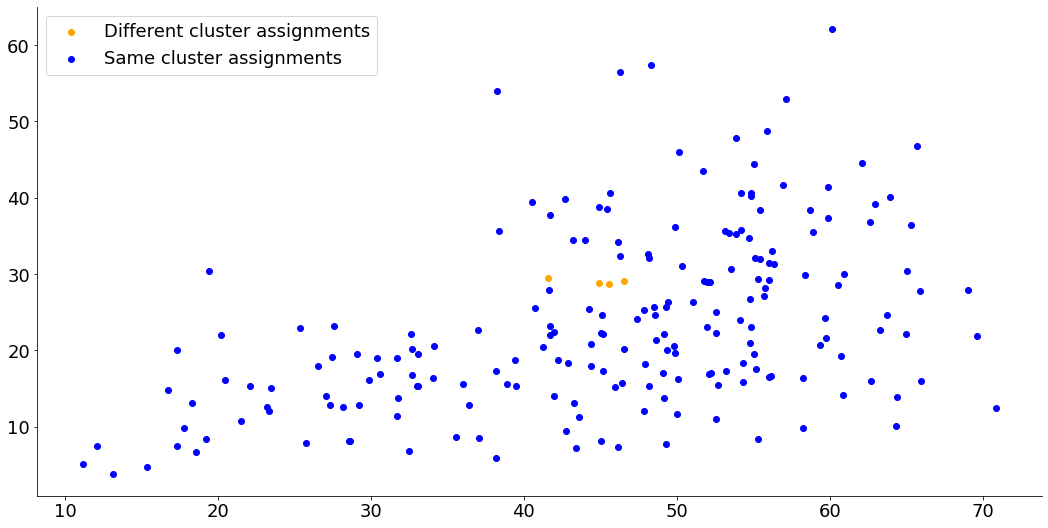

In [181]:

bad_zero = 0
bad_one = 1
bad_two = 2

kmeans_good.labels_ = np.where(kmeans_good.labels_ == bad_zero, 1000, kmeans_good.labels_)
kmeans_good.labels_ = np.where(kmeans_good.labels_ == bad_one, 111, kmeans_good.labels_)
kmeans_good.labels_ = np.where(kmeans_good.labels_ == bad_two, 222, kmeans_good.labels_)

kmeans_bad.labels_ = np.where(kmeans_bad.labels_ == 0, 1000, kmeans_bad.labels_)
kmeans_bad.labels_ = np.where(kmeans_bad.labels_ == 1, 111, kmeans_bad.labels_)
kmeans_bad.labels_ = np.where(kmeans_bad.labels_ == 2, 222, kmeans_bad.labels_)

print(f'{len(np.where(kmeans_good.labels_ != kmeans_bad.labels_)[0])} participants are assigned different categories')

diff = np.where(kmeans_good.labels_ != kmeans_bad.labels_)
same = np.where(kmeans_good.labels_ == kmeans_bad.labels_)


fig,ax = plt.subplots(figsize=(18,9))

ax.scatter(jeplmc_df.iloc[diff]['Between_Pointing'],jeplmc_df.iloc[diff]['Within_Pointing'],
           color='orange',label='Different cluster assignments')
ax.scatter(jeplmc_df.iloc[same]['Between_Pointing'],jeplmc_df.iloc[same]['Within_Pointing'],
           color='blue',label='Same cluster assignments')

plt.legend()
plt.show()

#ax.scatter(jeplmc_df.iloc[diff]['Between_Pointing_Corrected'],jeplmc_df.iloc[diff]['Within_Pointing_Corrected'],
#           color='orange',label='Different cluster assignments')
#ax.scatter(jeplmc_df.iloc[same]['Between_Pointing_Corrected'],jeplmc_df.iloc[same]['Within_Pointing_Corrected'],
#           color='blue',label='Same cluster assignments')


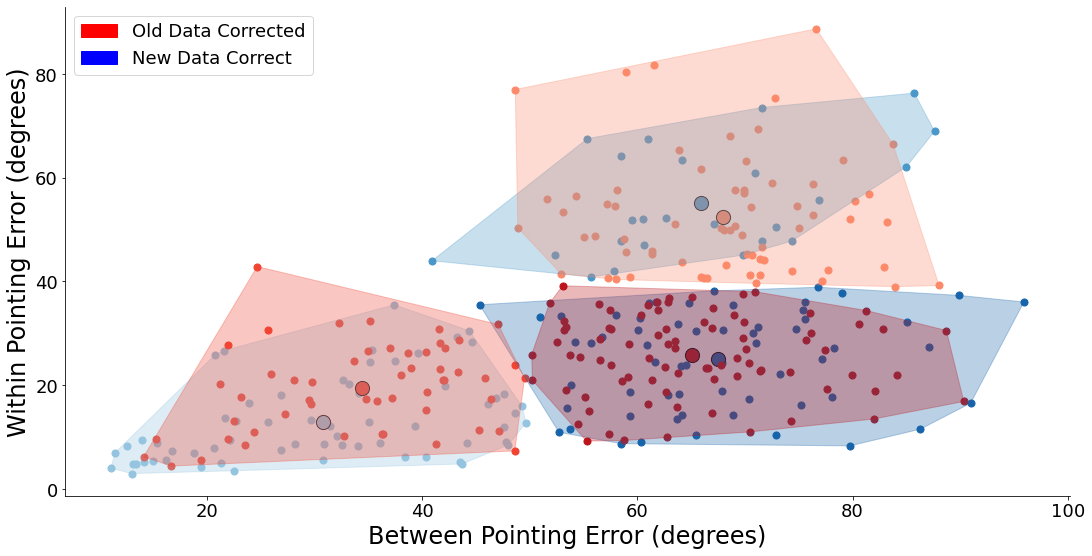

Good labels
[2 0 0 0 2 2 0 2 2 0 0 2 0 0 1 1 2 1 0 0 2 1 2 0 0 0 0 0 1 2 2 2 0 2 0 0 1
 0 2 1 0 2 0 2 0 0 0 2 0 1 1 0 1 0 2 0 1 1 1 2 0 2 1 1 1 2 0 2 0 2 0 2 2 1
 0 0 0 2 0 0 0 0 1 0 2 0 2 2 0 2 0 2 0 0 1 2 2 0 2 0 0 2 2 0 1 2 1 2 2 0 0
 0 2 2 0 2 0 2 0 2 2 2 2 2 0 0 0 2 1 2 0 2 0 2 0 2 1 2 2 2 0 2 2 2 0 2 1]
Bad labels
[0 1 2 0 0 1 1 0 1 0 0 1 2 1 2 1 0 1 1 1 2 2 0 0 1 1 1 1 1 1 2 1 1 2 2 0 0
 0 1 0 0 0 0 1 1 1 2 1 1 1 1 0 1 0 0 0 2 0 0 2 2 1 0 1 0 0 1 2 0 0 1 0 2 0
 0 0 1 0 1 0 2 2 2 2 1 2 1 1 0 2 1 0 2 0 0 2 1 1 0 1 2 2 1 1 0 2 1 0 1 0 2
 0 2 0 0 1 2 1 0 0 0 0 0 2 0 2 2 0 1 0 1 0 0 0 0 2 0 1 1 0 2 0 2 1 2 1 0 0
 0 0 1 1 2 1 0 1 2 2 1 0 0 2 2 2 1 0 2 0 0 2 0 2 0 2 0 1 0 0 2 1 2 0 2 2 1
 2 1 1 1 2 2 0 0 0 2 1 0 1 2 1 0 0 0 0]


C:\Users\stevenweisberg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


1

In [153]:
# Run the function  

new_color='blue'
new_label='New Data Correct'
orig_color='red'
orig_label='Old Data Corrected'

ax,kmeans_good = kMeansSilcton(new,new_label,ax=[],color=new_color,
                               between='good_pointing_coding_between',within='good_pointing_coding_within')

ax,kmeans_bad = kMeansSilcton(jeplmc_df,orig_label,ax=ax,color=orig_color,
                              between='Between_Pointing_Corrected',within='Within_Pointing_Corrected')

orig_patch = mpatches.Patch(color=orig_color, label=orig_label)
new_patch = mpatches.Patch(color=new_color,label=new_label)

plt.legend(handles=[orig_patch,new_patch])

plt.show()

# Trial level data

This section is more exploratory. We want to see whether there are specific effects of certain trials. Based on the explanation of the bug above, this is something we should expect to happen. 

First, a bit of a data carpentry. 

In [24]:
# Just some data carpentry here

# Map the mean onto the longform dataset. Do this separately for between/within. 
pointingData_within = pointingData.copy()
pointingData_between = pointingData.copy()
pointingData_within = pointingData_within[pointingData_within['same or different route'] == 'same']
pointingData_between = pointingData_between[pointingData_between['same or different route'] == 'different']

# For within...
pointingData_per_participant_within = pointingData_within.groupby('participant').bad_pointing.mean()
mean_dict_within = pointingData_per_participant_within.to_dict()
pointingData_within['partic_and_between_within_mean'] = pointingData_within['participant'].map(mean_dict_within)

# For between...
pointingData_per_participant_between = pointingData_between.groupby('participant').bad_pointing.mean()
mean_dict_between = pointingData_per_participant_between.to_dict()
pointingData_between['partic_and_between_within_mean'] = pointingData_between['participant'].map(mean_dict_between)

# Now concat them. 
pointingData = pd.concat([pointingData_between,pointingData_within])

# Now add some additional variables to allow us to compare a few cases: 
# Original data
# New data where there was a difference between buggy and correct coding. 
# New data where there was NO difference between buggy and correct coding. 
pointingData['pointing_code_error'] = np.where(np.isclose(pointingData["bad_pointing"],
                                         pointingData["good_pointing"]), 'no error', 'error')

pointingData['bad_good_orig_new'] = pointingData['pointing_code_error'] + "_" + pointingData['Original_or_New']

pointingData['bad_good_orig_new'] = np.where(pointingData['bad_good_orig_new']==
                                             'diff_Original', 
                                             'Original', 
                                             pointingData['bad_good_orig_new'])



## Carpet plot: Distribution of error by whether there was a bug or not

Fair warning, this plot is very busy. 

Start by looking at JUST the green dots. These are the original data, showing the distribution of the errors. All of the errors here are buggy coding (remember, we can't recreate the original data to know which trials are buggy and which ones are not). 

Now we can look at the orange and blue dots in each row. 

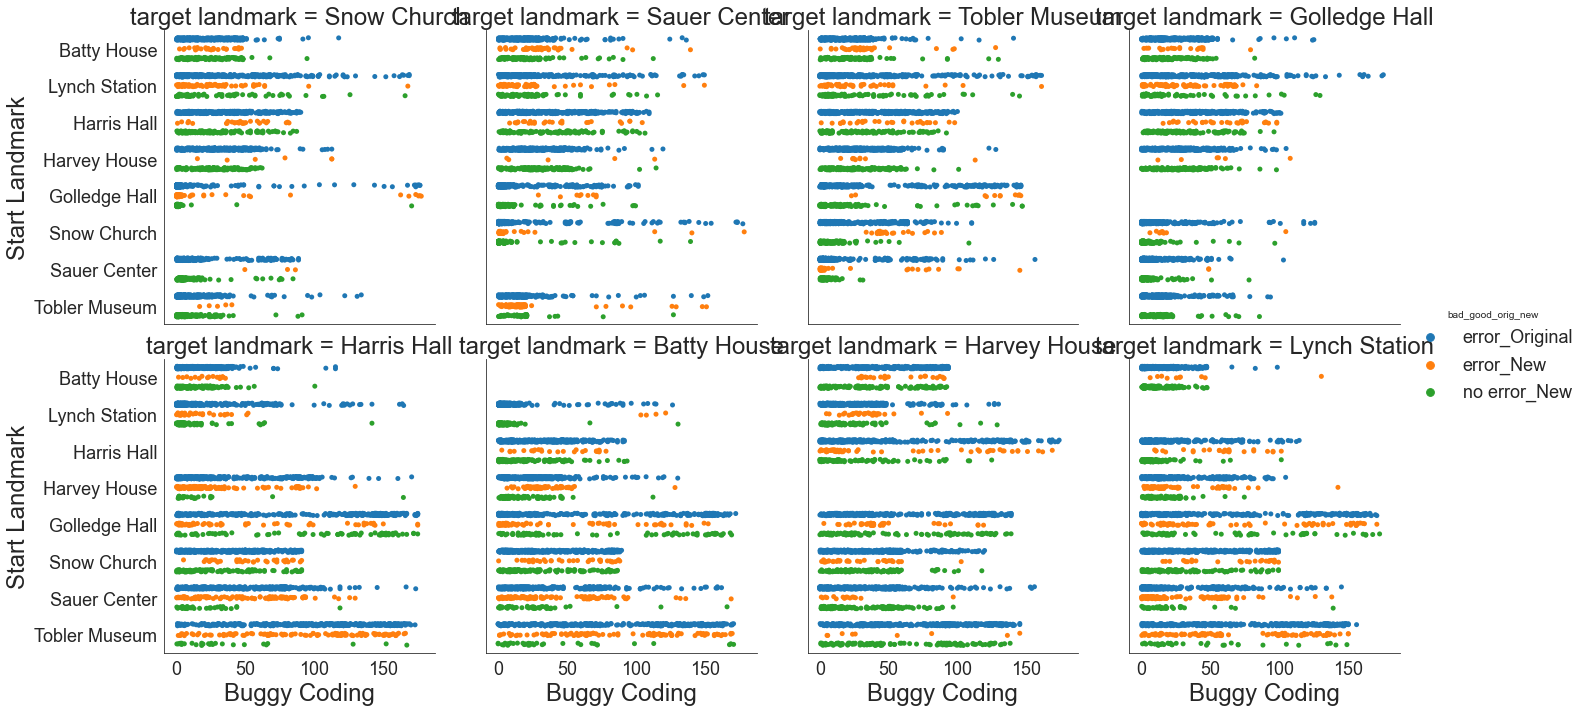

In [25]:
# Now we're ready! 
# Maybe a plot here of each pointing trial where each dot is colored by that subject's mean. 

# Sorry, there's a cross-reference future warning for the versions of these packages that I'm suppressing. 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# FUTURE WARNING 
#print(np.__version__) # = 1.19.2
#print(pd.__version__) # = 1.0.5


g = sns.catplot(x="bad_pointing", y="start landmark",
                col="target landmark", hue="bad_good_orig_new",
                col_wrap=4,data=pointingData, kind = "strip",
                jitter=True,dodge=True,legend=True,legend_out=True)

g.set_axis_labels("Buggy Coding", "Start Landmark")

plt.show(g)

What can we learn from this plot? 

One thing is that each trial (each row of blue/orange/green dots) has a different distribution of errors. 

Compare: 
1. Starting at Batty and pointing to Harris (lower left panel, top row) 
2. Starting at Golledge, pointing at Harris (lower left panel, 5th row down, labeled as "Golledge Hall"). 

The distributions of all dots are different between these two trials. Participants were almost guessing for Golledge -> Harris! But quite good for Batty -> Harris!

Another thing we can see if we look carefully is that the orange and green dots have DIFFERENT distributions. This is another way of saying that committing an error was NOT random. Instead, it depended on the particular trial. This also suggests that committing a pointing judgment resulting in a buggy coding affected different distributions of judgments. 

The next plot examines this phenomenon from a different perspective. 

## Distributions of pointing angles by trial

<div class="alert alert-block alert-info">
<b>Note:</b> Rather than analyzing the pointing **errors** as we have been, we are now looking at the raw pointing angles. That is, relative to the reference angle (which we will set to 0), what do the distributions of pointing judgments look like for each trial? In a simple model of the world, we would expect each distribution to be normally distributed around the correct judgment. So, if the building is located 45 degrees counter-clockwise from the reference angle, we would expect pointing judgments to be normally distributed around -45. Because we know that the bug took the absolute value of each pointing judgment, this will allow us to see which pointing trials had a lot of problematic pointing judgments (i.e., those that have the opposite sign of the correct answer).</div> 


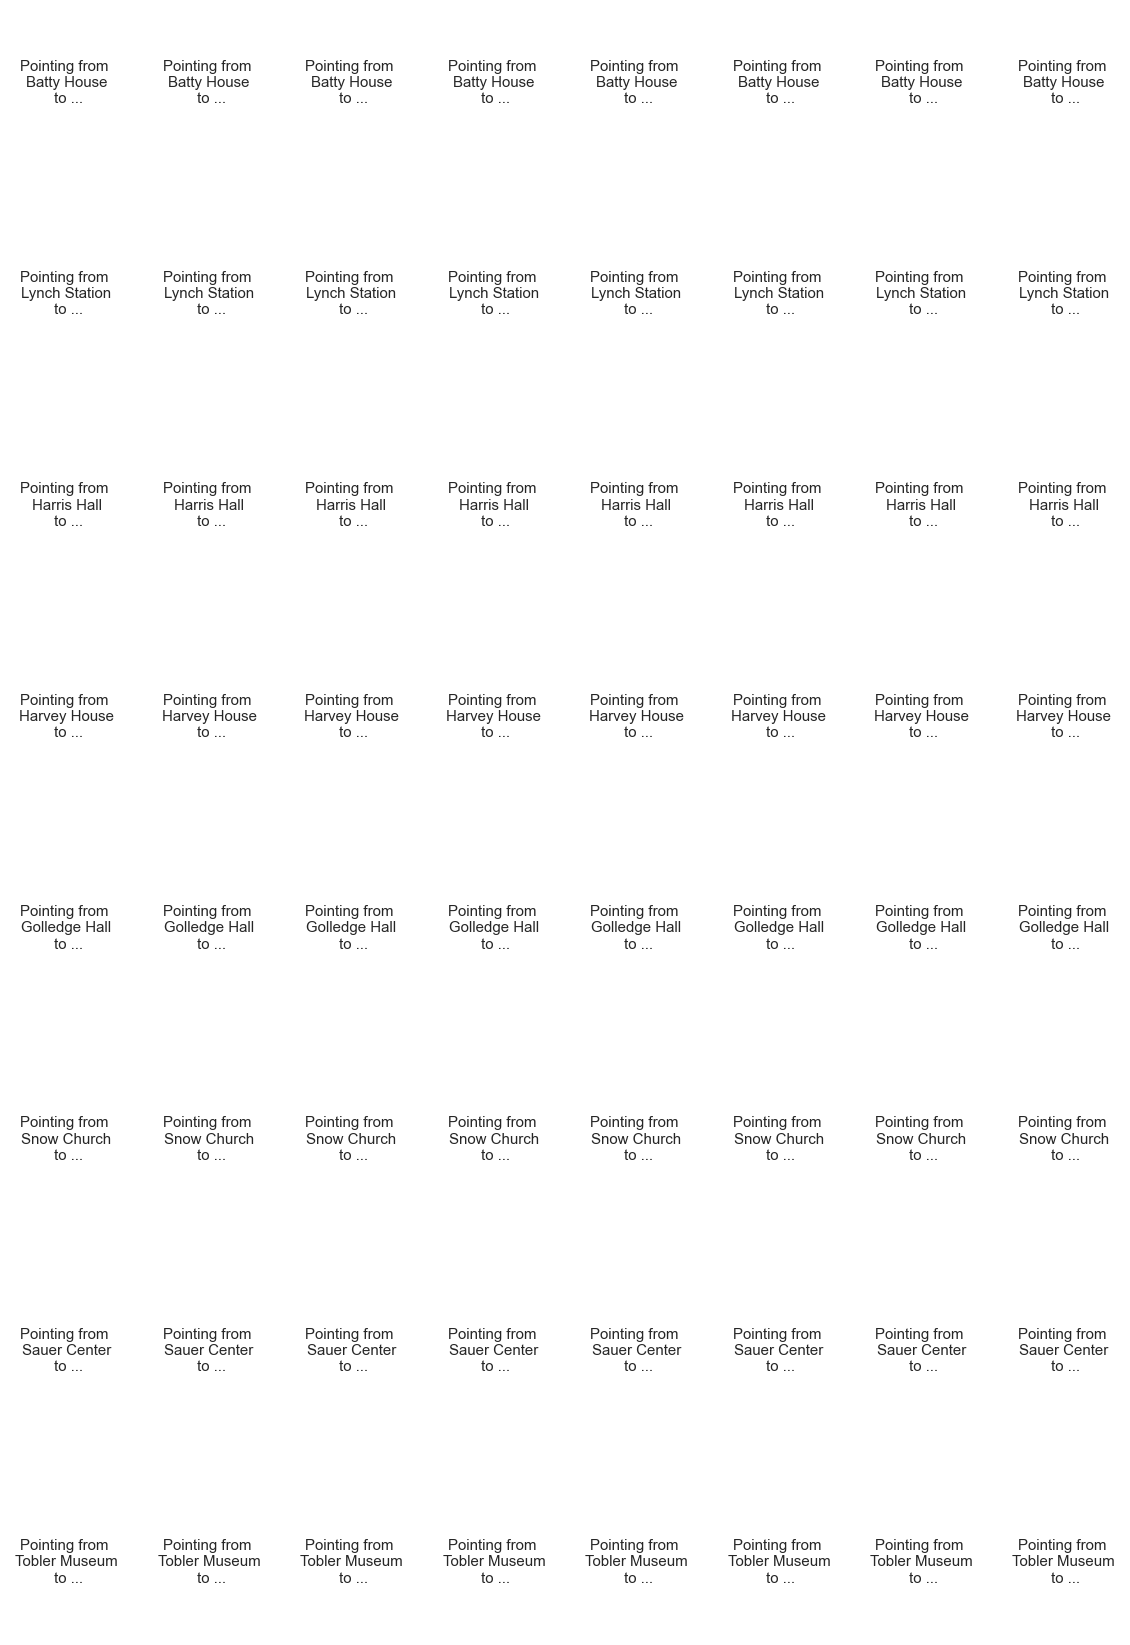

In [26]:
buildings = ['Batty House','Lynch Station','Harris Hall','Harvey House','Golledge Hall','Snow Church','Sauer Center','Tobler Museum']


fig, axes = plt.subplots(8,8, sharey=True, figsize=(20,30))

plt.subplots_adjust(hspace=.4)

for fromNum,pointFrom in enumerate(buildings):
    
    for toNum,pointTo in enumerate(buildings):
        
        oneVal = pointingData[pointingData['start landmark'] == pointFrom]
        oneVal = oneVal[oneVal['target landmark'] == pointTo]
        oneVal = oneVal[oneVal['Original_or_New'] == 'New']
        
        try:
            val = oneVal.groupby('start landmark')['actual direction'].mean()[0]
            plotVal = val
            if val < 0:
                plotVal = -val
                oneVal['bearing'] = -oneVal['bearing']
            

            if fromNum == 0 and toNum == 1:
                legend = True
            else:
                legend = False
            
            g = sns.histplot(ax=axes[fromNum,toNum],data=oneVal, x="bearing"
                             ,hue='pointing_code_error',
                             hue_order=['no error','error'],
                             binwidth=20,binrange=[-181,181],stat='probability',
                             legend = legend)
            
            
            axes[fromNum,toNum].set_xticks([-180,-90,0,90,180])
            axes[fromNum,toNum].set_xticklabels(['-180','-90','0','90','180'])
            axes[fromNum,toNum].set_xlabel('Pointing Direction')
            axes[fromNum,toNum].axvline(x=plotVal)
            g.set_title(pointTo + ' ' + str(val)[:5])
        
        except:
            axes[fromNum,toNum].axis('off')
            axes[fromNum,toNum].text(0.5, 0.5, 'Pointing from \n' + pointFrom + '\n to ...',
                           verticalalignment='center',horizontalalignment='center',
                           transform=axes[fromNum,toNum].transAxes,fontsize=15)
            pass
             
        

## Interpreting that plot

As a reminder, here is how the bug works: 

The blue line down the center is the angle of the actual judgment. For example, standing at Batty Hall, pointing to Harris Hall, the participant would need to point 37.52&deg;. That angle means that standing at Batty, facing down the route toward Lynch Station, Harris Hall's front door will be 37.52&deg; clockwise. 

However, any judgments that were counter-clockwise from that facing direction would have had a bug. In other words, a perfectly correct judgment (37.52&deg;) would have been recorded exactly the same as a pointing judgment that was 37.52&deg; COUNTER-CLOCKWISE. 

All of the ACTUAL pointing angles have been been made positive (compare the actual angle written for say Batty House to Lynch Station, which is -47) for ease of viewing. The reference angle is always 0 here (even though that changes for each row compared to actual North in Silcton). 

Note that any judgments that were counter-clockwise from the reference angle (negative) were buggy. That means, in the original data, these judgments would have been flipped over onto the positive side of the x-axis. 

We can note another curious thing we discussed earlier. Some judgments were unaffected (Pointing from Tobler Museum to Golledge Hall). Every single participant judgment was clockwise (and pretty accurate). On the other hand, judgments that were near zero had a LOT of buggy judgments (Pointing From Sauer Center to Batty House). But these judgments would have resulted in almost no change to the data. That's because the actual angle is so close to the reference angle that changing an error calculation of: 

`|-35 - 6| = 41` is pretty close to `|35 - 6| = 29` - although not identical. 

Other trials are more problematic. This is the case when pointing from Harris Hall to Batty House. Here, although there are a fairly small number of erroneous judgments, these result in huge changes. If a participant responded -90&deg;, this would have been coded as correct, even though it is off by almost 180&deg;. 

# Technical details and sanity checking

## Ensuring the coordinates were correct

(NORA: VICTOR advocates removing this section, which I think I agree with. What do you think?) 

Various changes to the Silcton environment over the years, and the discovery of this error, meant I wanted to find and re-create the coordinates used in the original calculation of the model building task AND the actual angular directions. 

To do so, I discovered a .yml / .json layout in the [seeds.rb](https://bitbucket.org/ab320012/silcton/src/master/db/seeds.rb) file on the website. This is the original file that tells the website how to code each pointing judgment. The calculations for the correct angle were actually coming from code on the Ruby side, which converted the building coordinates into the angles between them. 

One thing that appeared true about these coordinates (front_door_pixel_x and front_door_pixel_y is they were flipped 180 degrees about the z-axis. That is, the Y-coordinates were reversed. I have verified that this does not affect the model-building task AND did not affect the pointing task any further (since everything was in absolute values anyway). 

However, to ensure these coordinates were still correct, I created a set of cube objects in the Unity scene currently being used to generate the virtual environments. These cubes needed to be scaled (1.2), rotated (180 in X and Y directions), and translated; then lined up with the front door locations of the buildings. 

This made me confident that the original coordinates were still correct; although to determine whether the actual angle should be stored as *positive* (clockwise from the facing direction to 180) or *negative* (counterclockwise from the facing direction to 180). 

# Fixing the bug

The first step was to fix two aspects of how the data were coded and stored. First, replacing the original unsigned calculation with a signed calculation. 

<img src="../images/Fixed_Unity_Pointing_Angle_Calculation.png">

The only changes to this line are to store the SignedAngle (which returns a negative angle when the participants turns LEFT with respect to the direction from the first vector, and returns a positive angle when the participant turns RIGHT with respect to the first vector). 

A quick word about the inputs to that function: 

The first two inputs are vectors. The first, is the vector between the pointers' current position and the NEXT diamond along the route, except for the last building on each main route, for which the facing diamond is the PREVIOUS diamond. (So, from Batty house, the facing diamond is Lynch Station; but from Harvey House, the facing diamond is Harris Hall). One additional tweak to the code was required, which is the y-values needed to be the same for the current position and the facing diamond position. 

The last input is the vector around which the rotation should be calculated (in this case, the vector pointing straight up). 

Now, Unity is returning the signed angles (positive or negative) with respect to a particular direction (facing the next or previous diamond). 